# Counting people until type A is identified

<font size="3">Instead of time (or distance), let's count the number of persons until type A (say how many persons until someone with beard apppears) shows up in two different locations. Can this be characterized with exponential distributions? What type. Afterall, the count of persons until a particular one shows is equivalent to time; the more people the more time ("measure of things until something happens"). The distribution of the interval (whatever the measure taken) until something occurs usually follows an exponential distribution. If we have to exponential distributions, we could use a Wilcoxon test to compare whether differences between them exists, meaning to test whether the interval is different across groups, across locations in this example. </font> 
<p class="aligncenter">
    <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimg.pngio.com%2Fmassive-crush-pt-1-all-saints-youth-ministry-people-walking-png-gif-302_170.gif&f=1&nofb=1" alt="centered image" />
</p>


In [126]:
library(repr)
options(repr.plot.width=12, repr.plot.height=12)

In [127]:
uni.int<-c(1,1,3,1,1,3,8,1,1,7,7,2,2,11,4,1,15,1,2,1,1,
           1,1,1,1,2,1,1,1,1,2,1,3,3,3,8,7,1,10,1,1,1,1,2,1,3,2,
           1,1,1,1,1,2,1,1,2,1,1,1,2,1,5,1,1,2,1,2,1,1,3,3,1,1,1,1,
           7,1,1,1,1,4,5,2,4,1,1,1,1,1,1,1,1,1,1,1,4,2,3,1,1,3,1,
           1,1,1,1,1,1,1,4,1,1,1,5,1,1,8,4,4,1,2,1,1,1,1,2,7,1,1,
           5,7,1,1,1,2,1,1,1)#how many persons pass until type A is seen
#thus this is the proportion of type A person, much higher here
prop.int<-length(uni.int)/sum(uni.int)#pertsonen zenbat betetzen duten
prop.int

liz.int<-c(11,36,8,19,23,20,3,7,20,41,30,17,4,1,4,9,6,
           37,4,1,1,1,5,6,1,1,4,1,8,3,5,5,7,35,3,8,6,8,40)
#thus
#thus
prop.liz<-length(liz.int)/sum(liz.int)
prop.liz

[1] 0.4569536

[1] 0.08685969

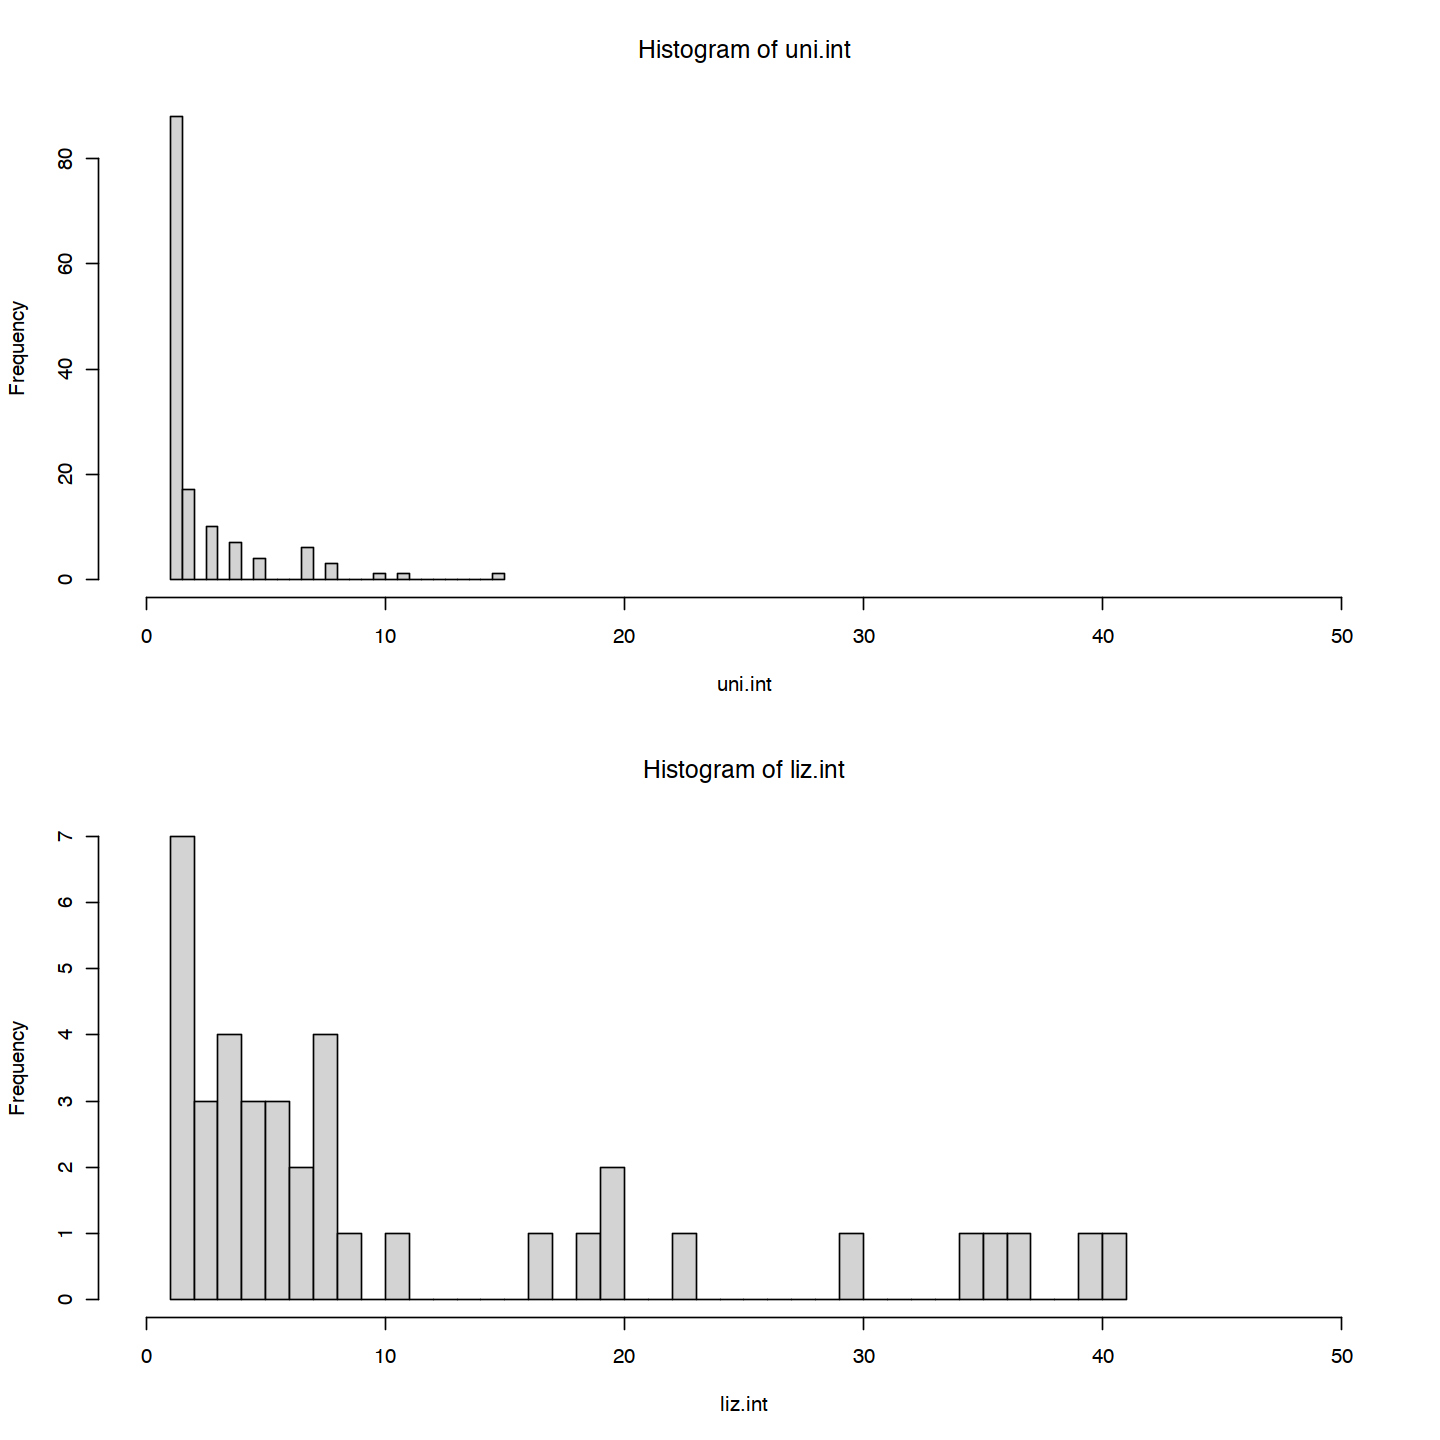

In [128]:
par(mfrow = c(2, 1))
hist(uni.int,xlim=c(0,50),breaks=30)
hist(liz.int,xlim=c(0,50),breaks=50)

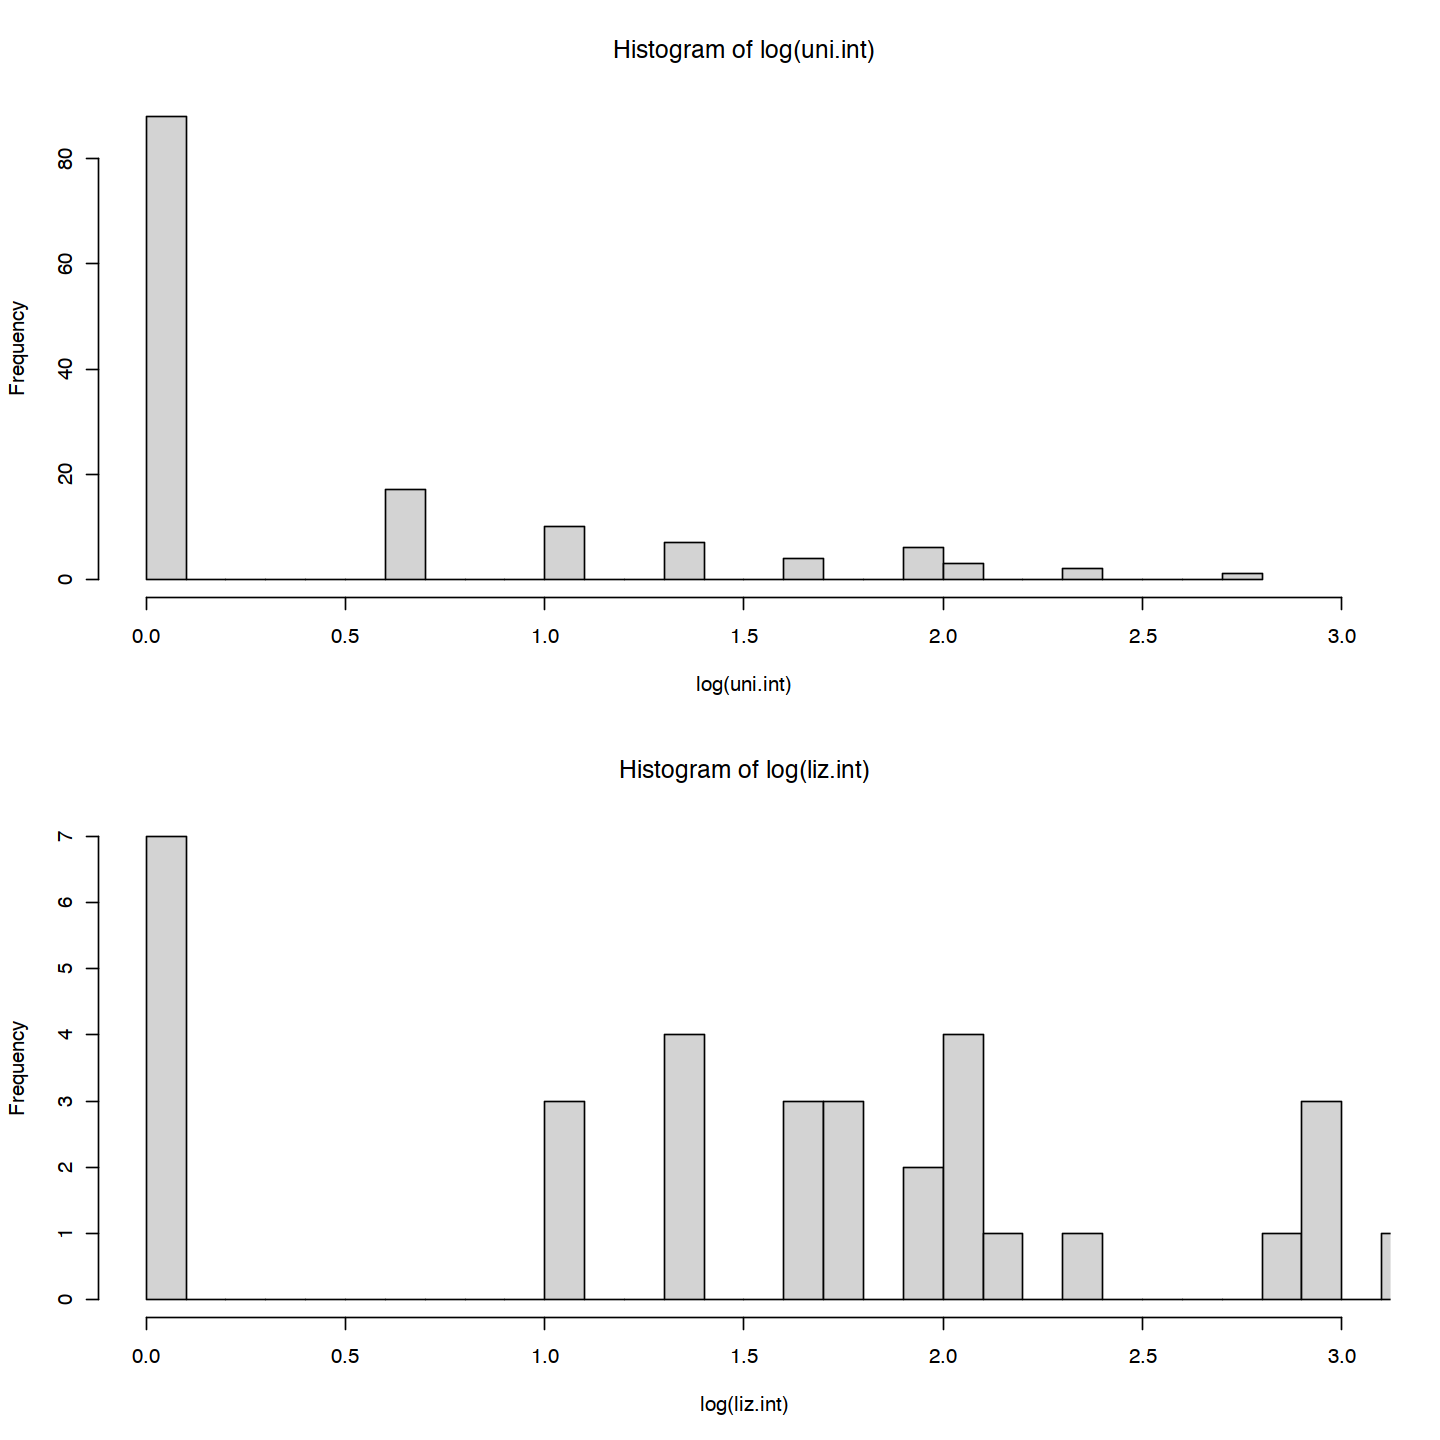

In [159]:
par(mfrow = c(2, 1))
hist(log(uni.int),breaks=30,xlim=c(0,3))
hist(log(liz.int),breaks=50,xlim=c(0,3))

In [129]:
uni.ecdf<-ecdf(uni.int)
uni.ecdf(median(uni.int))#63% of data is equal or below the median
liz.ecdf<-ecdf(liz.int)
liz.ecdf(median(liz.int))
#what about 95% of data values

[1] 0.6376812

[1] 0.5128205

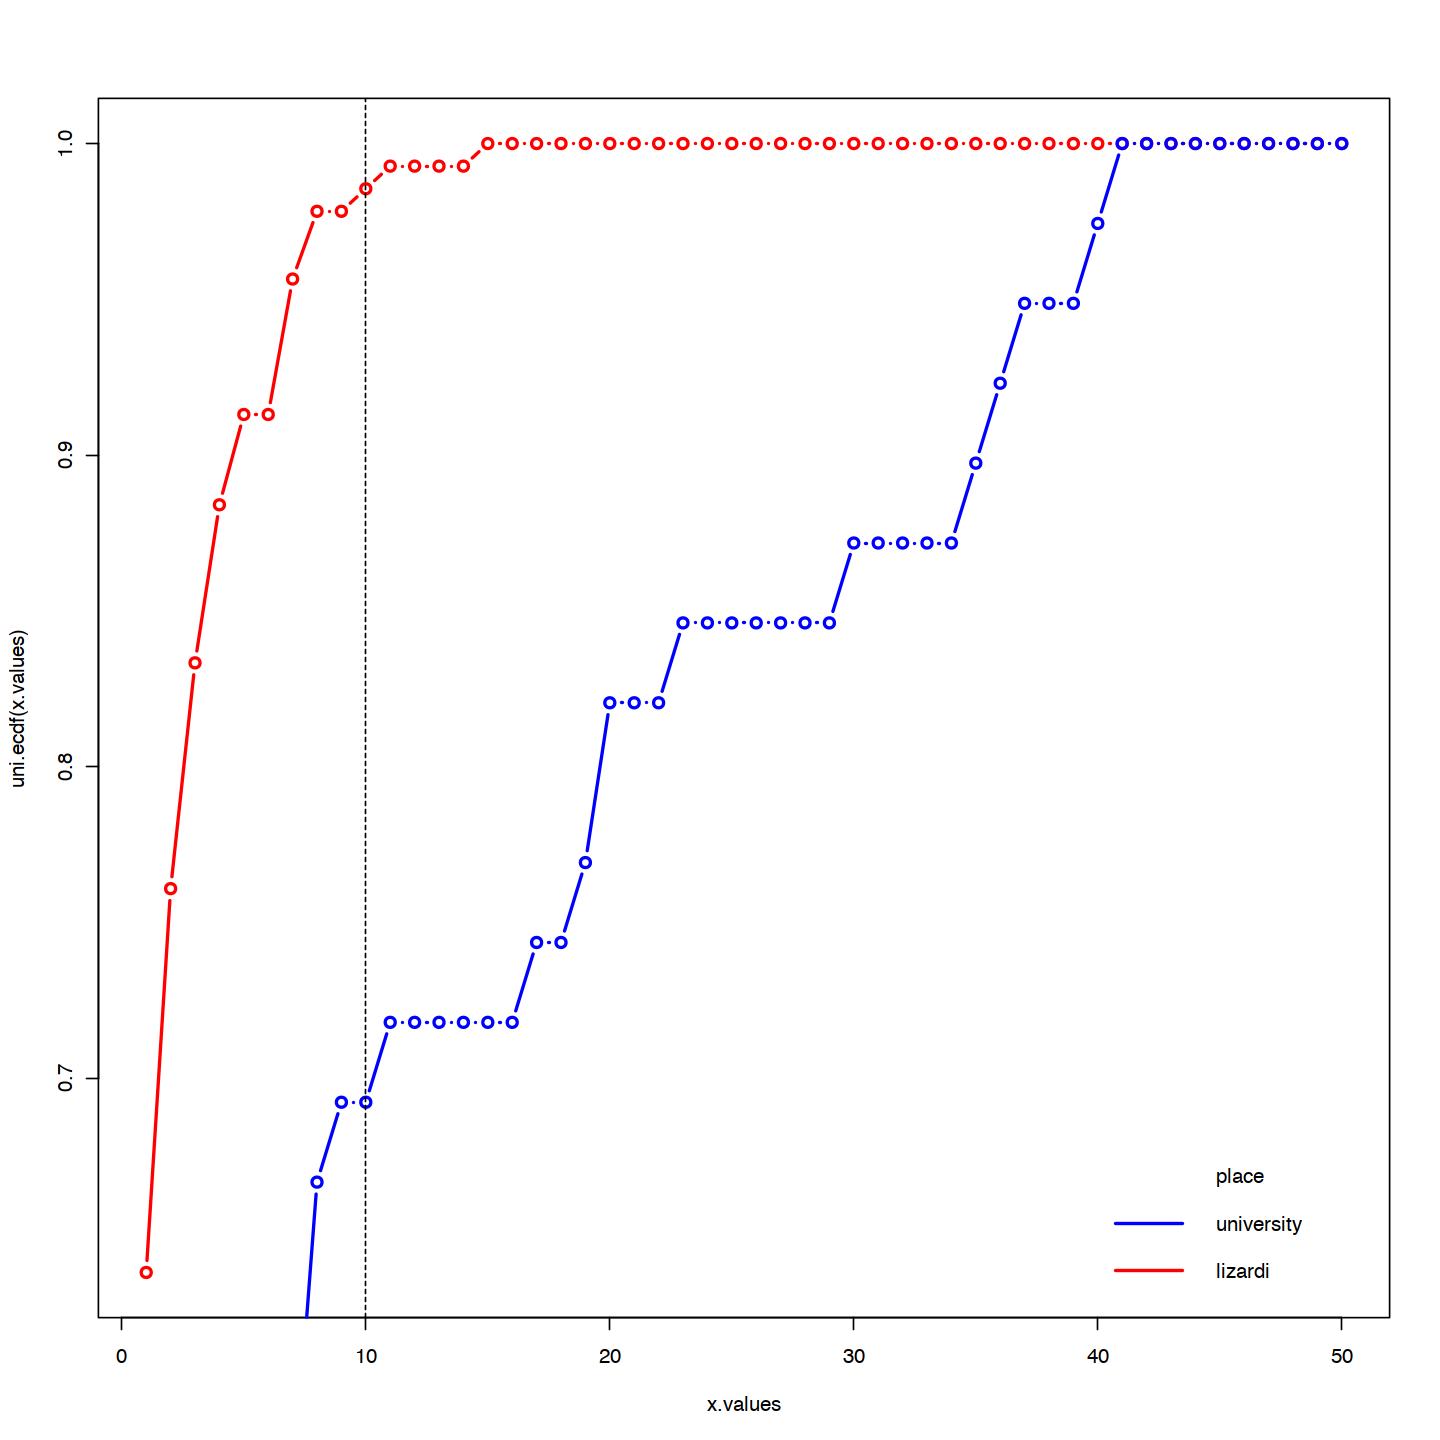

In [130]:
x.values<-seq(1,50)
plot(x.values,uni.ecdf(x.values),type="b",col="red",lwd=2)
lines(x.values,liz.ecdf(x.values),type="b",col="blue",lwd=2)
abline(v=10,lty=2)
legend("bottomright", c("place", "university", "lizardi"),
       lty = c(0, 1, 1), col = c("red", "blue"), box.lty = 0, lwd = 2)

In [131]:
uni.ecdf(10)#98% of data values are equal or less than 10
liz.ecdf(10)#67% of data values are equal or less than 10
#difference between places is really clear, we need to check more people until type A shows up.

[1] 0.9855072

[1] 0.6923077

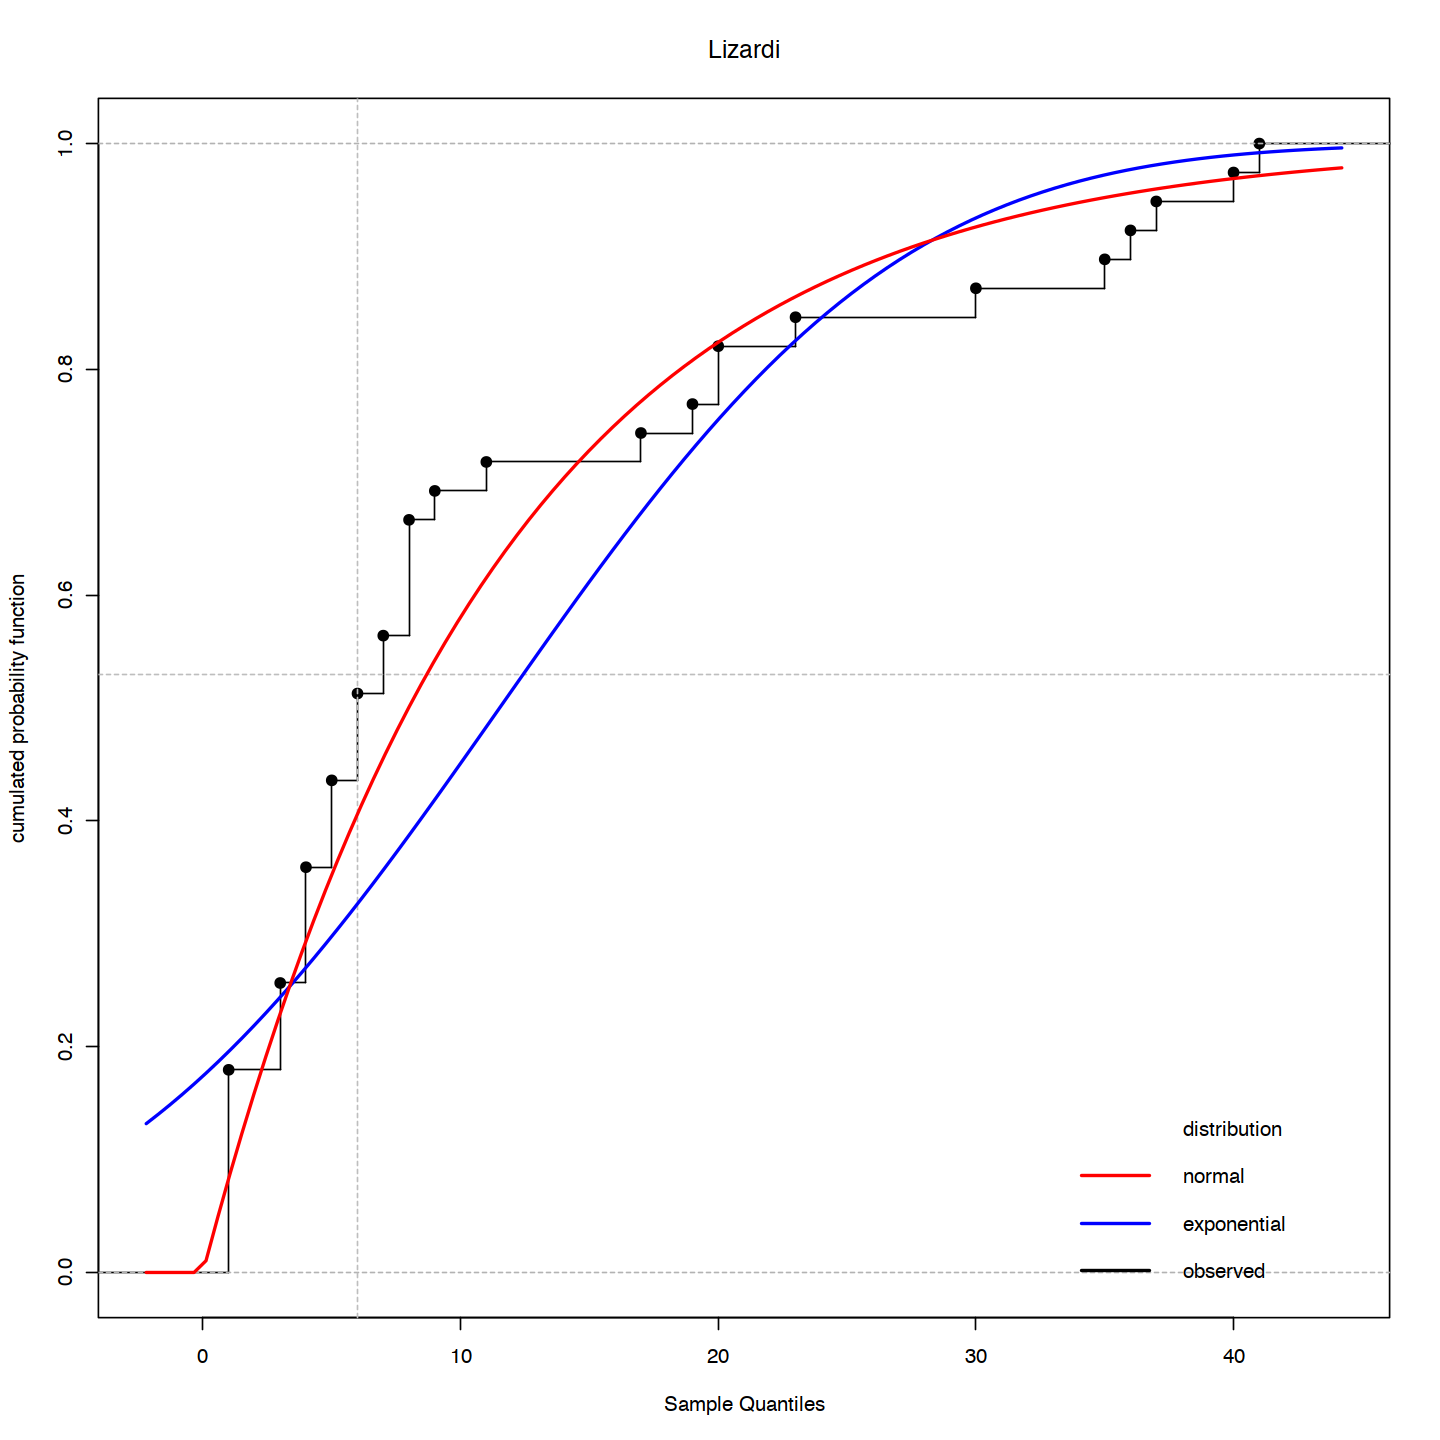

In [132]:
plot(liz.ecdf, xlab = 'Sample Quantiles',
     main = 'Lizardi',ylab="cumulated probability function",verticals=T)
# mark the median (second quartile)
abline(v=median(liz.int),h=0.5294118,lty=2,col="grey")#median
#theoretical ecdf for normal data
curve(pnorm(x, mean(liz.int), sd(liz.int)),
      add = TRUE, col='blue', lwd = 2)
#theoretical ecdf for exponential data
curve(pexp(x, 1/mean(liz.int)),
      add = TRUE, col='red', lwd = 2)  
legend("bottomright", c("distribution", "normal", "exponential","observed"),
       lty = c(0, 1,1,1), col = c("transparent","red", "blue","black"), box.lty = 0, lwd = 2)

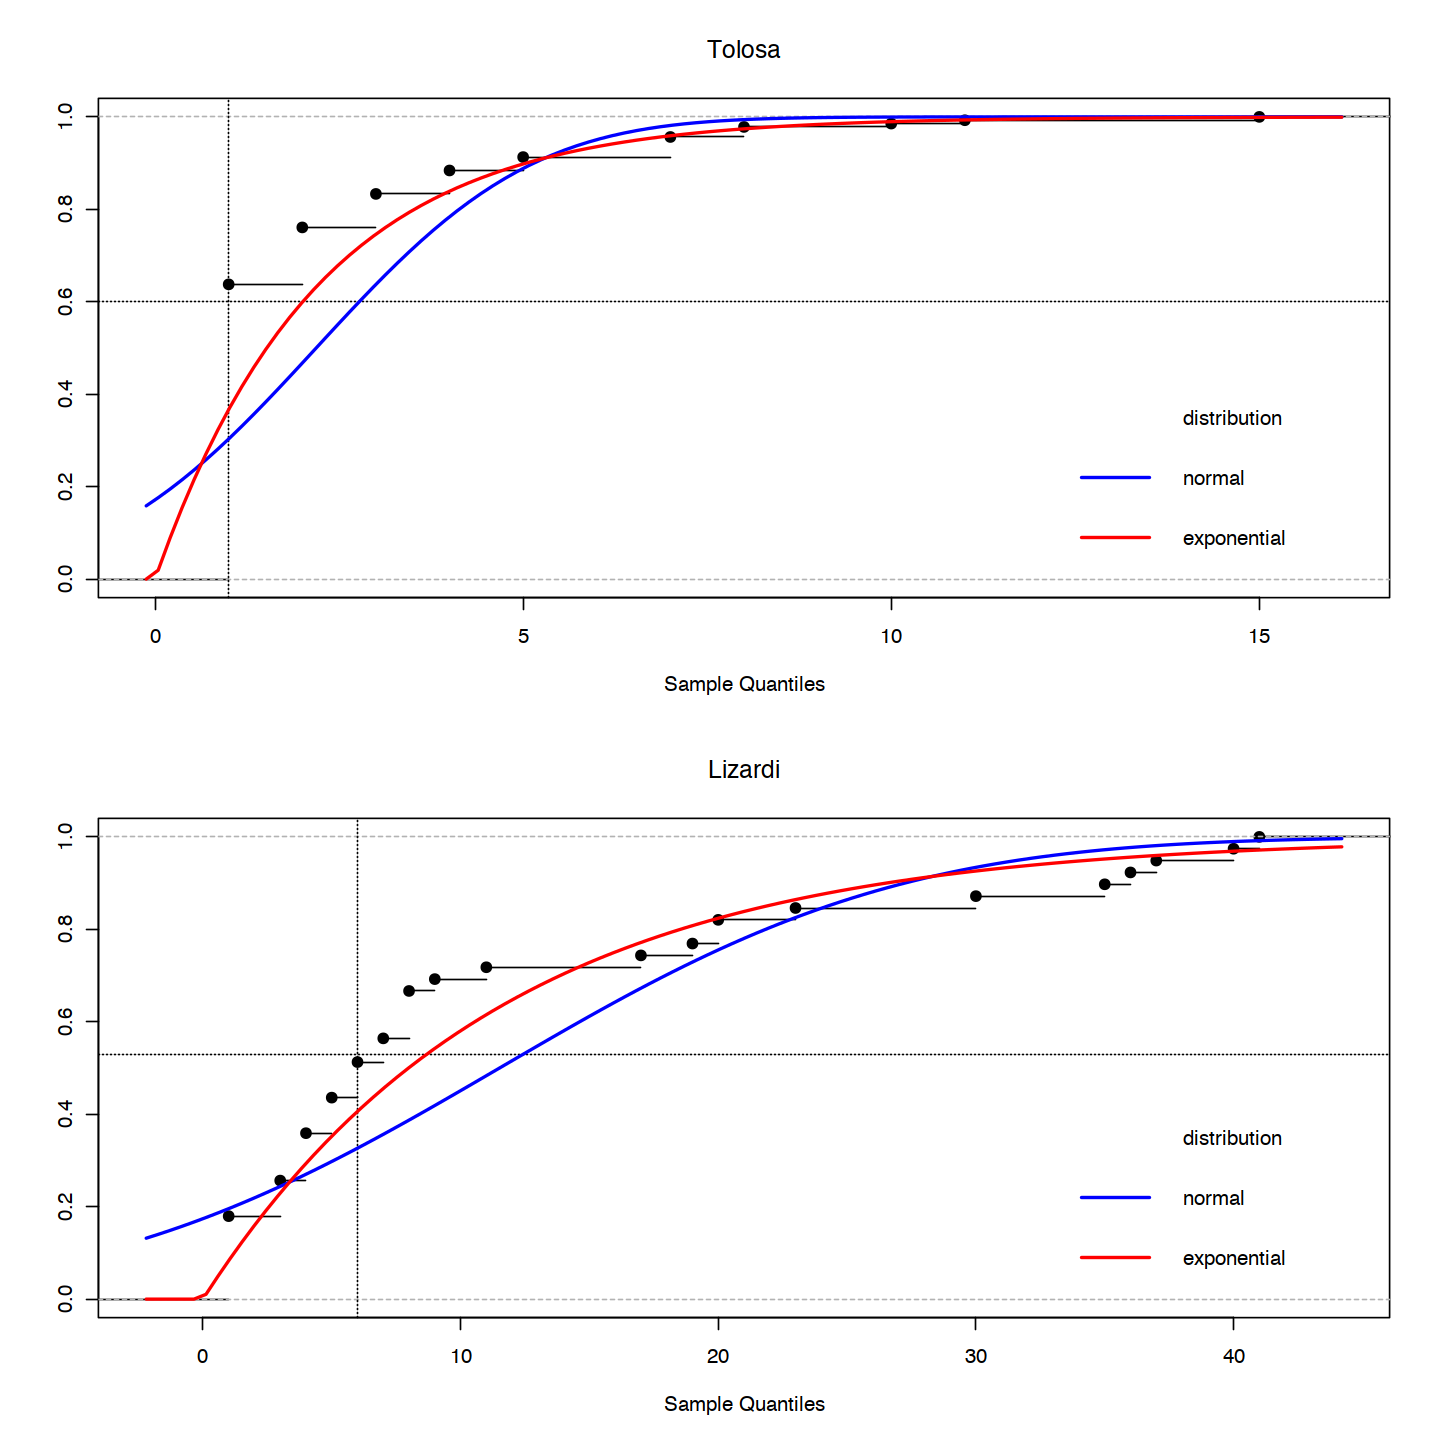

In [133]:
par(mfrow = c(2, 1))
plot(uni.ecdf, xlab = 'Sample Quantiles',
     ylab = '', main = 'Tolosa')
# mark the median (second quartile)
abline(v=median(uni.int),h=0.6,lty=3)#median
#theoretical ecdf for normal data
curve(pnorm(x, mean(uni.int), sd(uni.int)),
      add = TRUE, col='blue', lwd = 2)
#theoretical ecdf for exponential data
curve(pexp(x, 1/mean(uni.int)),
      add = TRUE, col='red', lwd = 2)
legend("bottomright", c("distribution", "normal", "exponential"),
       lty = c(0, 1, 1), col = c("red", "blue"), box.lty = 0, lwd = 2)


plot(liz.ecdf, xlab = 'Sample Quantiles',
     ylab = '', main = 'Lizardi')
# mark the median (second quartile)
abline(v=median(liz.int),h=0.5294118,lty=3)#median
#theoretical ecdf for normal data
curve(pnorm(x, mean(liz.int), sd(liz.int)),
      add = TRUE, col='blue', lwd = 2)
#theoretical ecdf for exponential data
curve(pexp(x, 1/mean(liz.int)),
      add = TRUE, col='red', lwd = 2)  
legend("bottomright", c("distribution", "normal", "exponential"),
       lty = c(0, 1, 1), col = c("red", "blue"), box.lty = 0, lwd = 2)

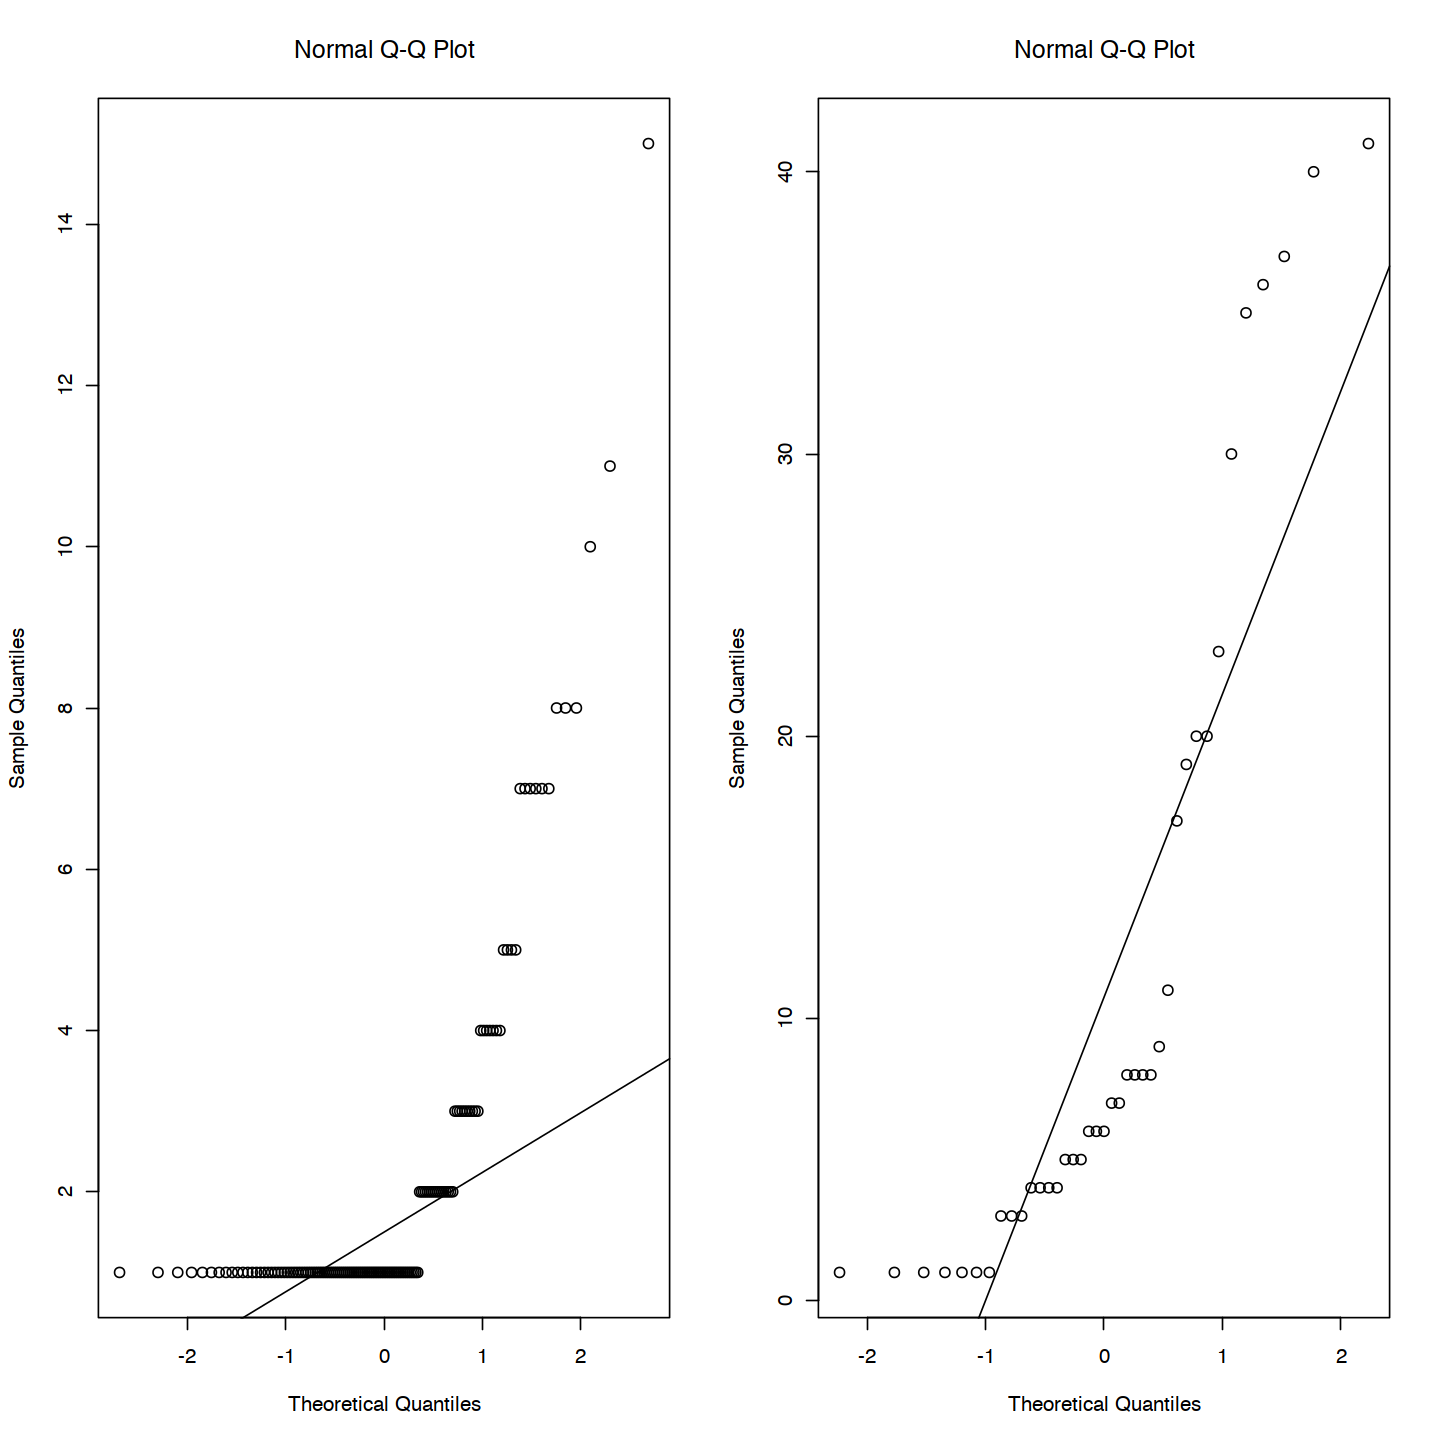

In [134]:
#check the non normality
par(mfrow = c(1,2))
qqnorm(uni.int)
qqline(uni.int)

qqnorm(liz.int)
qqline(liz.int)

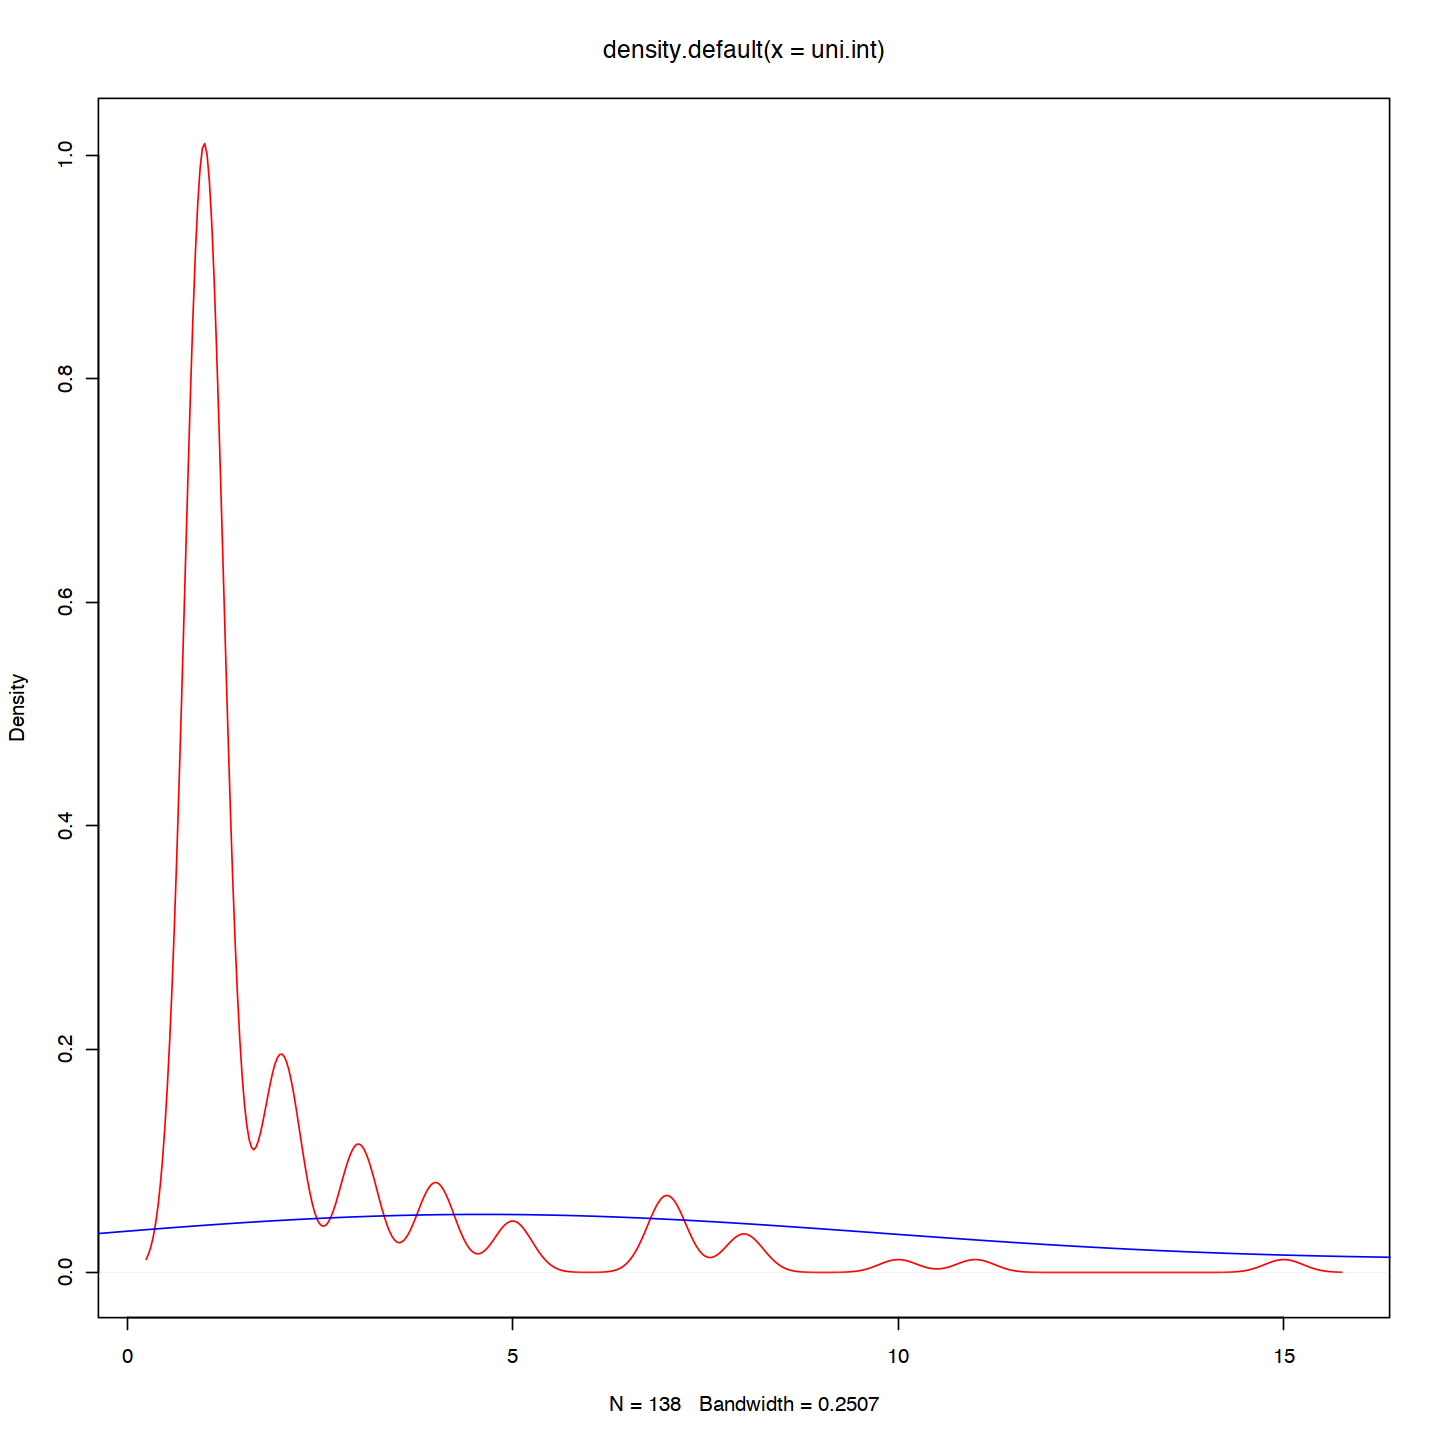

In [135]:
plot(density(uni.int),col="red")
lines(density(liz.int),col="blue")

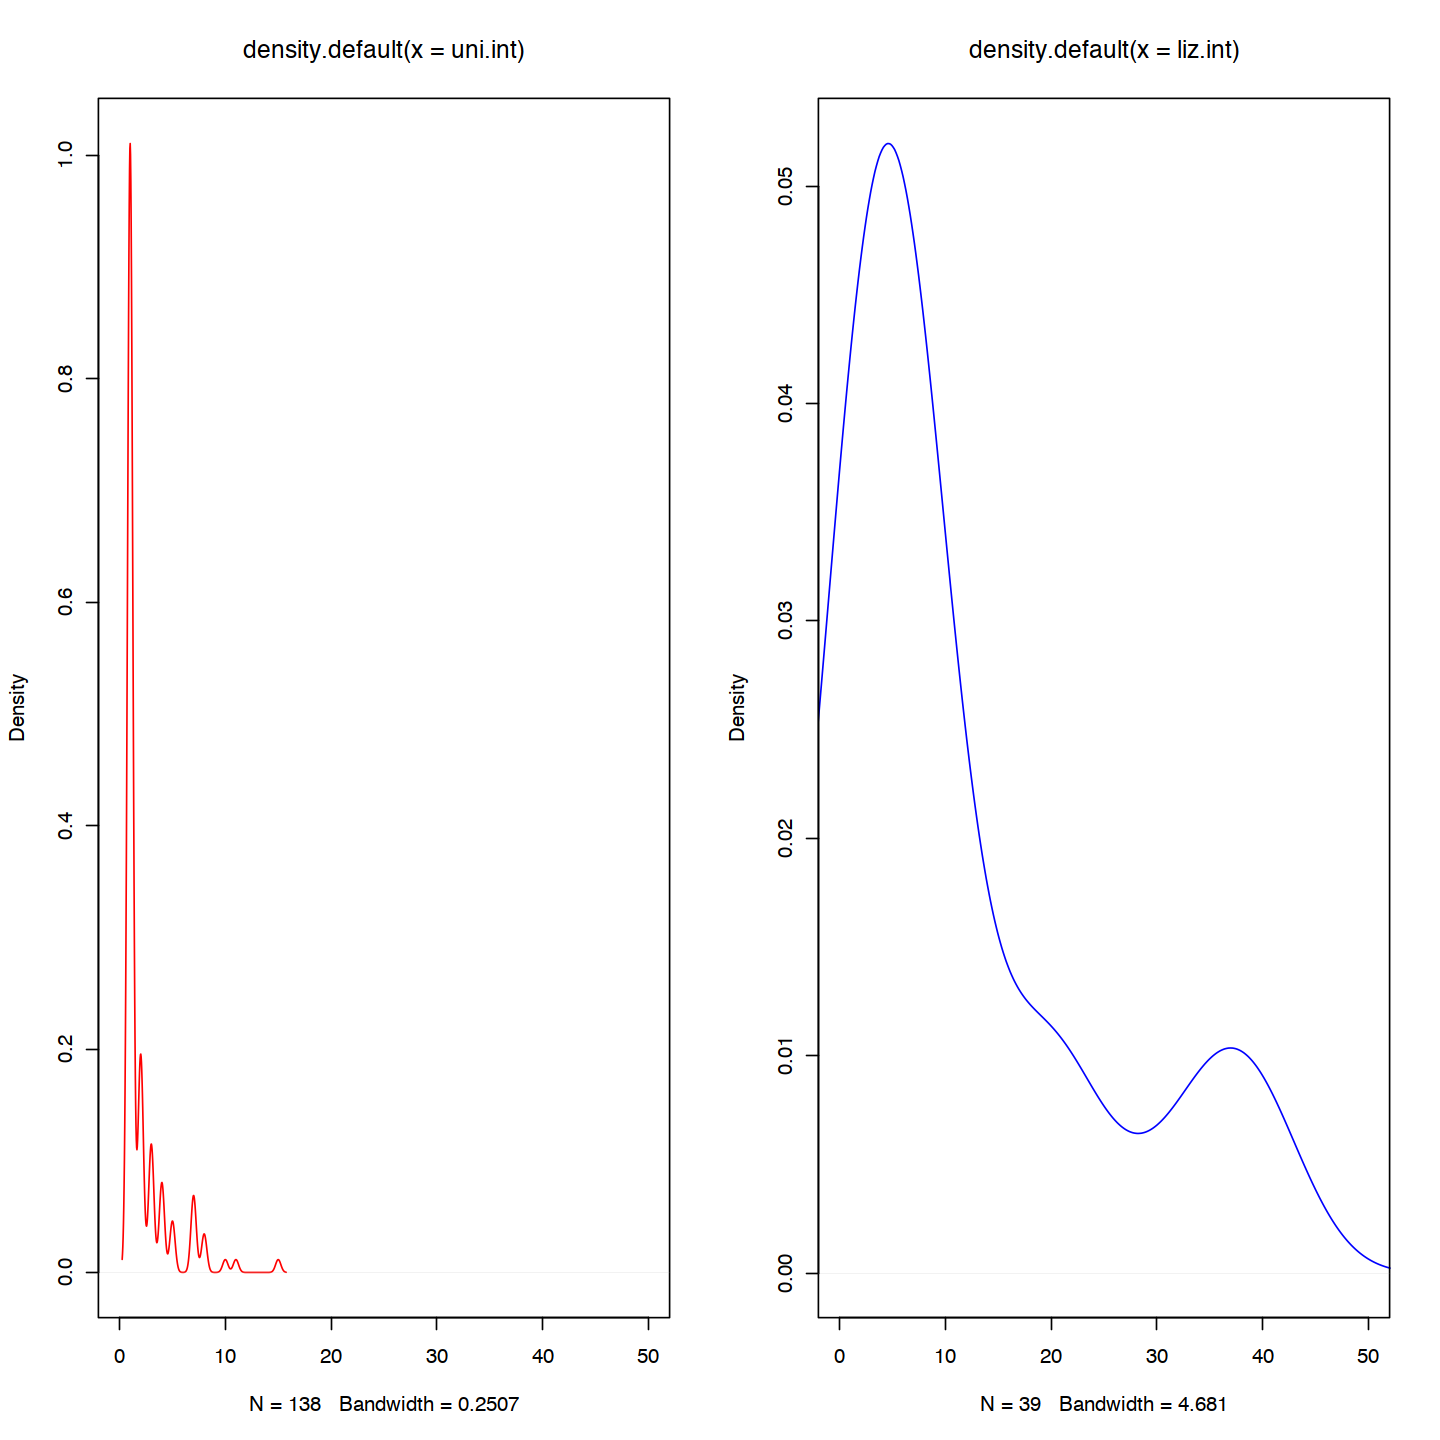

In [136]:
par(mfrow = c(1,2))
plot(density(uni.int),col="red",xlim=c(0,50))
plot(density(liz.int),col="blue",xlim=c(0,50))

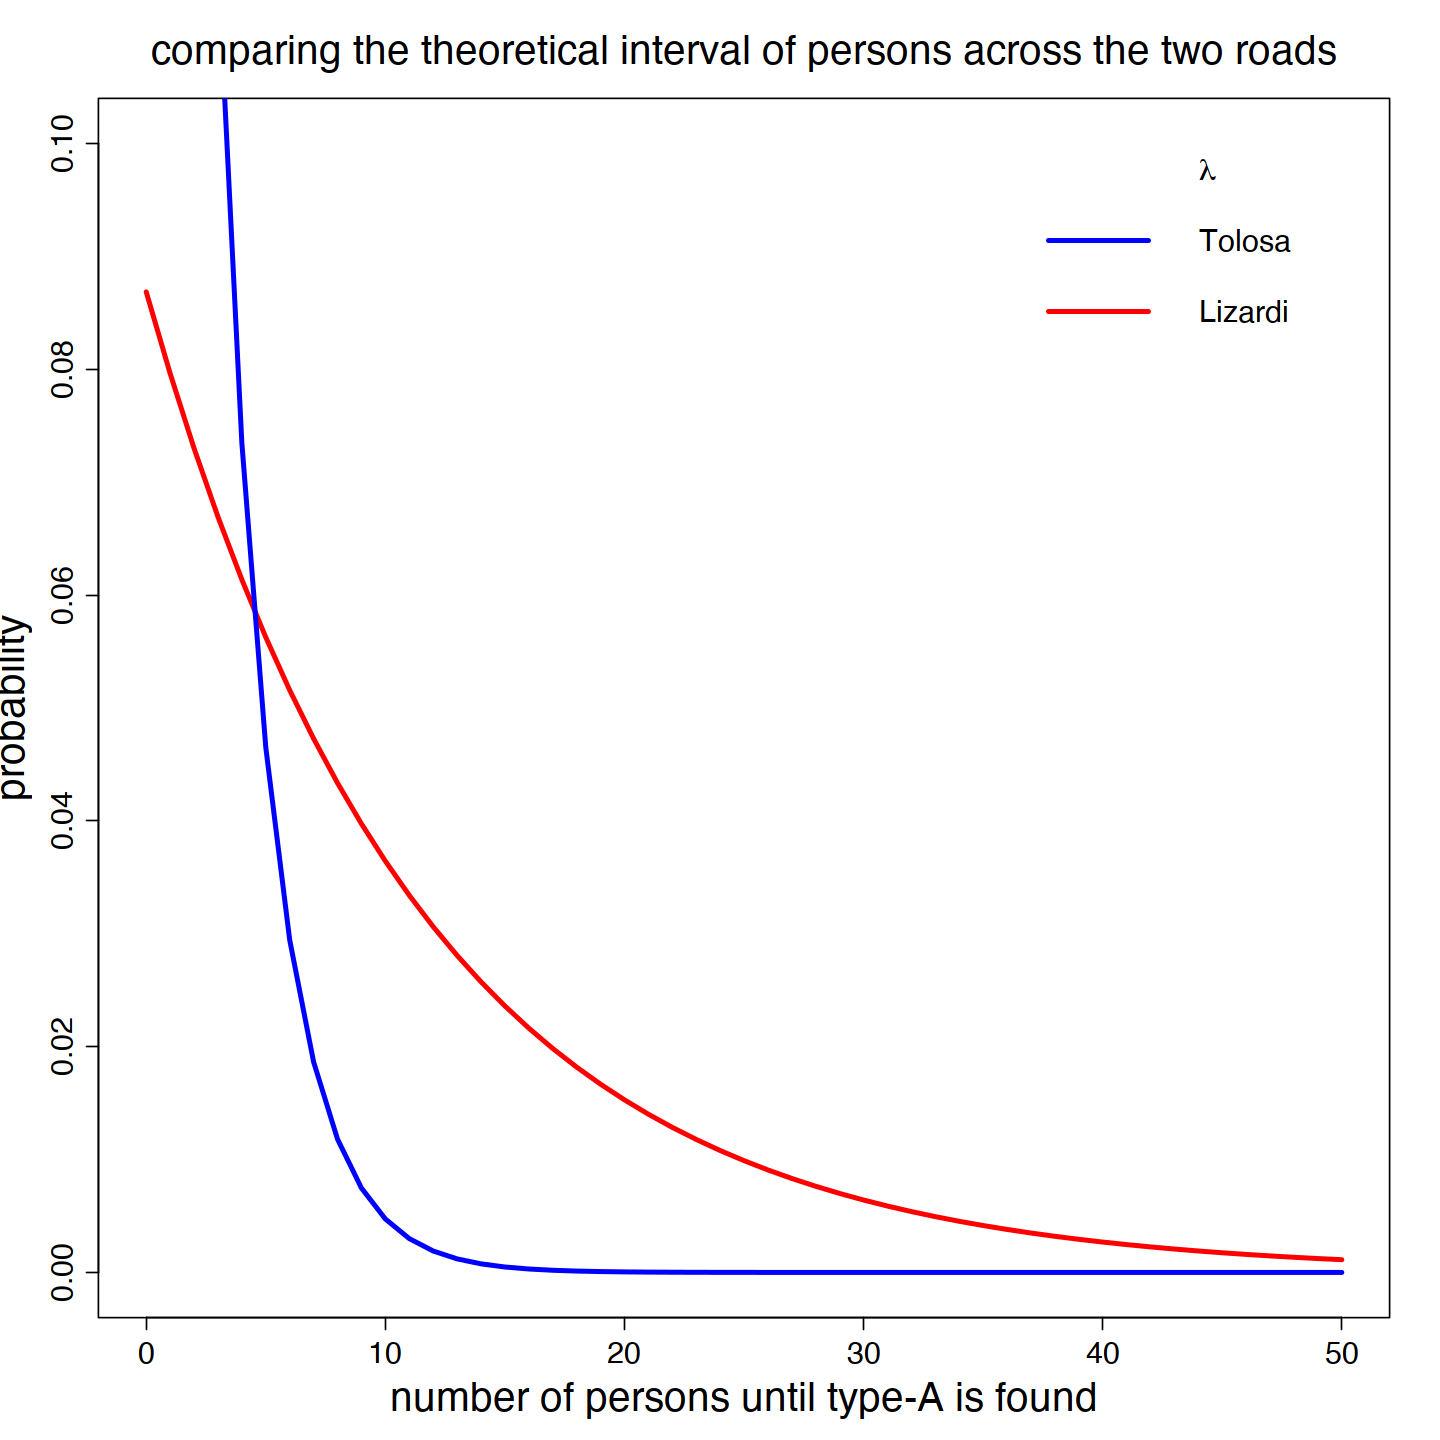

In [174]:
person.num <- seq(0, 50, by = 1)# Specify x-values 
#for exp function
#Now, we can apply the dexp function with a rate of 5 as follows:
int.p <- dexp(person.num, rate = 1/mean(liz.int))  
int.t <- dexp(person.num, rate = 1/mean(uni.int))  

plot(person.num,int.p,main="comparing the theoretical interval of persons across the two roads",
     type="l",lwd=3,col="red",xlab="number of persons until type-A is found",
     ylim=c(0,0.1),ylab="probability",cex.lab=2,cex.axis=1.5,
     cex.main=2)
lines(person.num,int.t,
      type="l",lwd=3,col="blue")
      # Adding a legend
legend("topright", c(expression(paste(, lambda)), "Tolosa", "Lizardi"),
       lty = c(0, 1, 1), col = c("red", "blue"), box.lty = 0, lwd = 3,cex=1.5)

In [138]:
summary(uni.int)
summary(liz.int)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   2.188   2.000  15.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.50    6.00   11.51   18.00   41.00 

In [139]:
wilcox.test(uni.int,liz.int)


	Wilcoxon rank sum test with continuity correction

data:  uni.int and liz.int
W = 938.5, p-value = 1.47e-11
alternative hypothesis: true location shift is not equal to 0


The probability of finding A every x number of persons is really high at campus, a mean examination of two persons is usually enough to find A, whereas in Lizardi a count of 11 persons is needed. It is really hard to go beyond 10 persons at the University without finding A, whereas in Lizardi drops exponentially till 40 persons. This difference is statistically significant (*W* = 938.5, *p* < 0.001).

In [140]:
#https://r-coder.com/exponential-distribution-r/

In [141]:
#the probability of the variable interval (of rate 1/2 aprox) taking a value lower or equal to 10 at the uni is
pexp(10,1/mean(uni.int))

[1] 0.9896372

In [142]:
#the probability of the variable interval (of rate 1/2 aprox) taking a value lower or equal to 10 at Lizardi is
pexp(10,1/mean(liz.int))

[1] 0.5804602

In [143]:
qexp(0.989637237466056,1/mean(uni.int))

[1] 10

In [144]:
qexp(0.95,1/mean(uni.int))#95% of the values would be of less or equal to

[1] 6.555878

In [145]:
qexp(0.95,1/mean(liz.int))#and in Lizardi

[1] 34.48933

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.pinimg.com%2Foriginals%2F34%2F9b%2Fdc%2F349bdce7fbcc03eb560ccd0ace5c1437.gif&f=1&nofb=1" alt="centered image" />

# Can we fit data to a binomial distribution?
<p>
Afterall every person that passes is or is not type A. But it is a different approach as we are playing now with proportions of type A and not with intervals. So... simulate 10000 thousand people and whether their are type A based on known observed proportion.

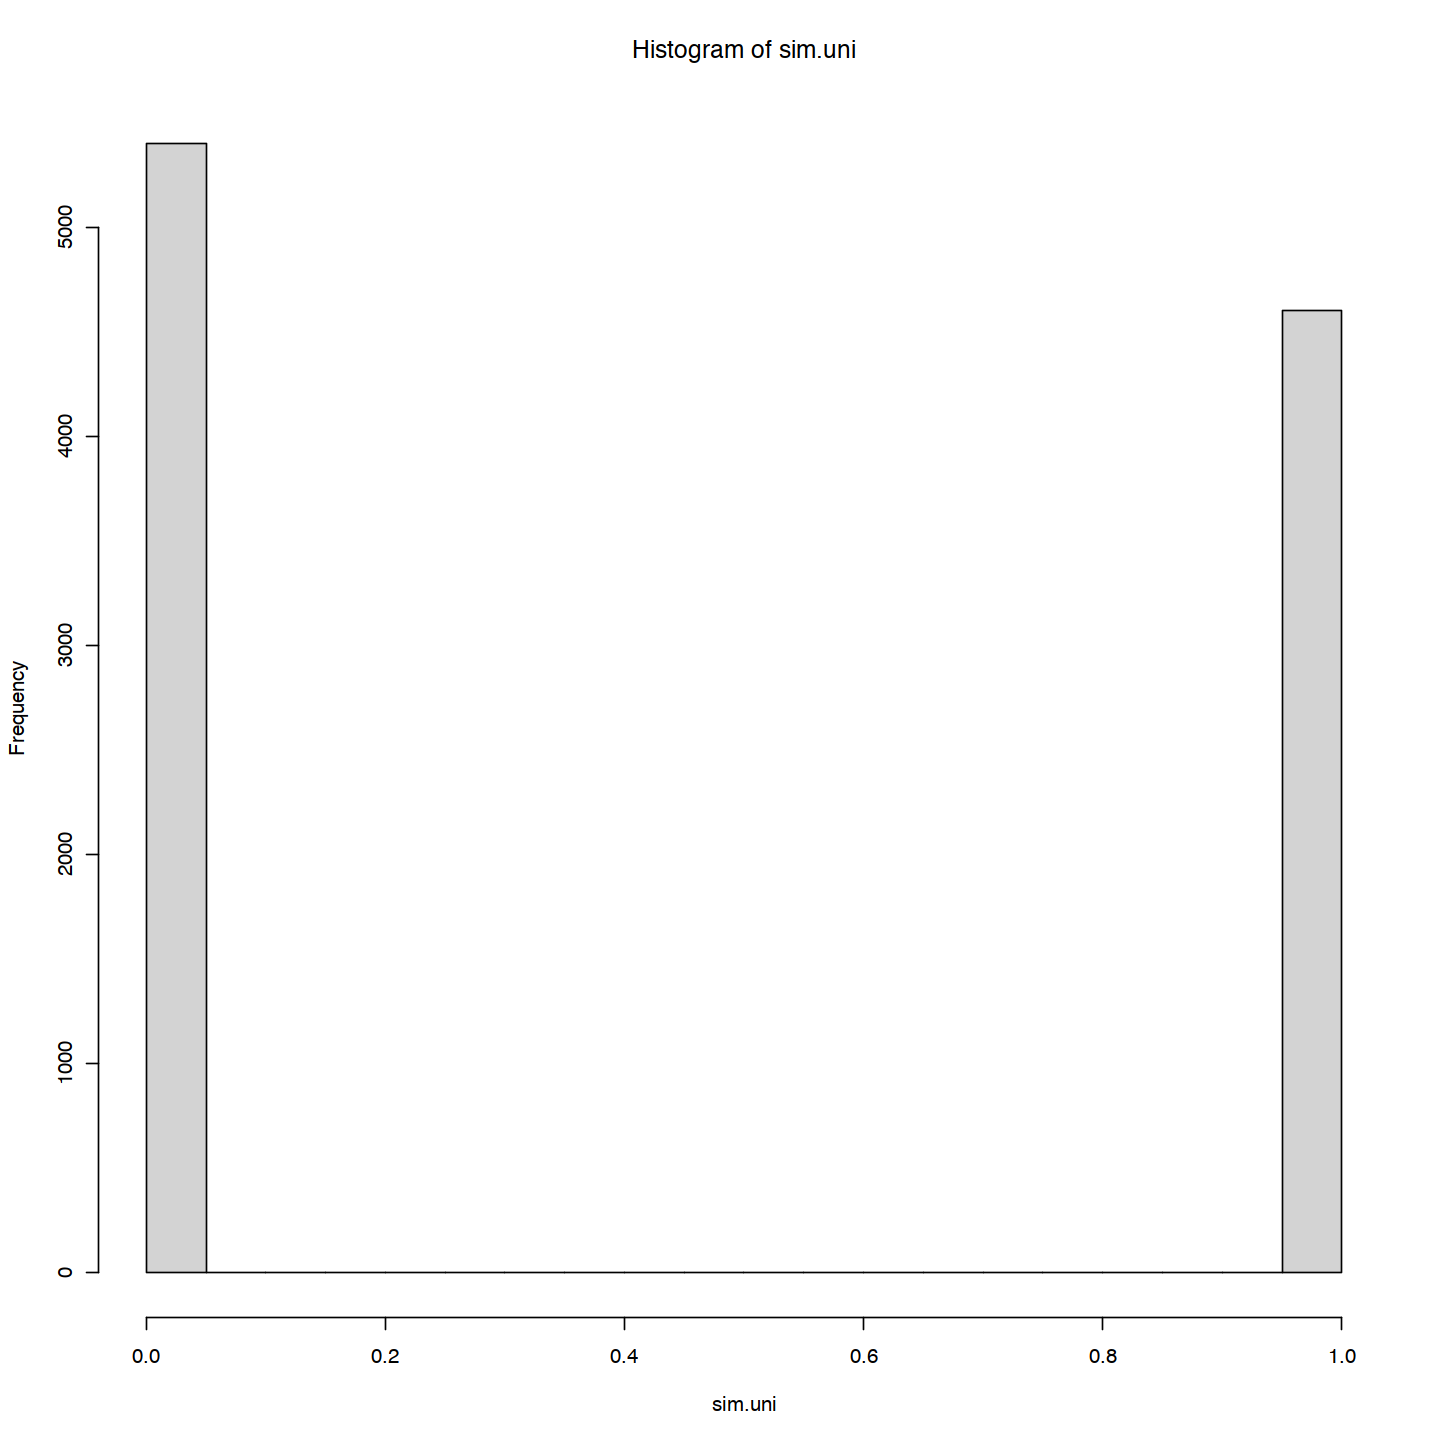

In [146]:
sim.uni<-rbinom(10000,1,prob = prop.int)
hist(sim.uni)
#hum, yes, but not very elegant.

[1] 138

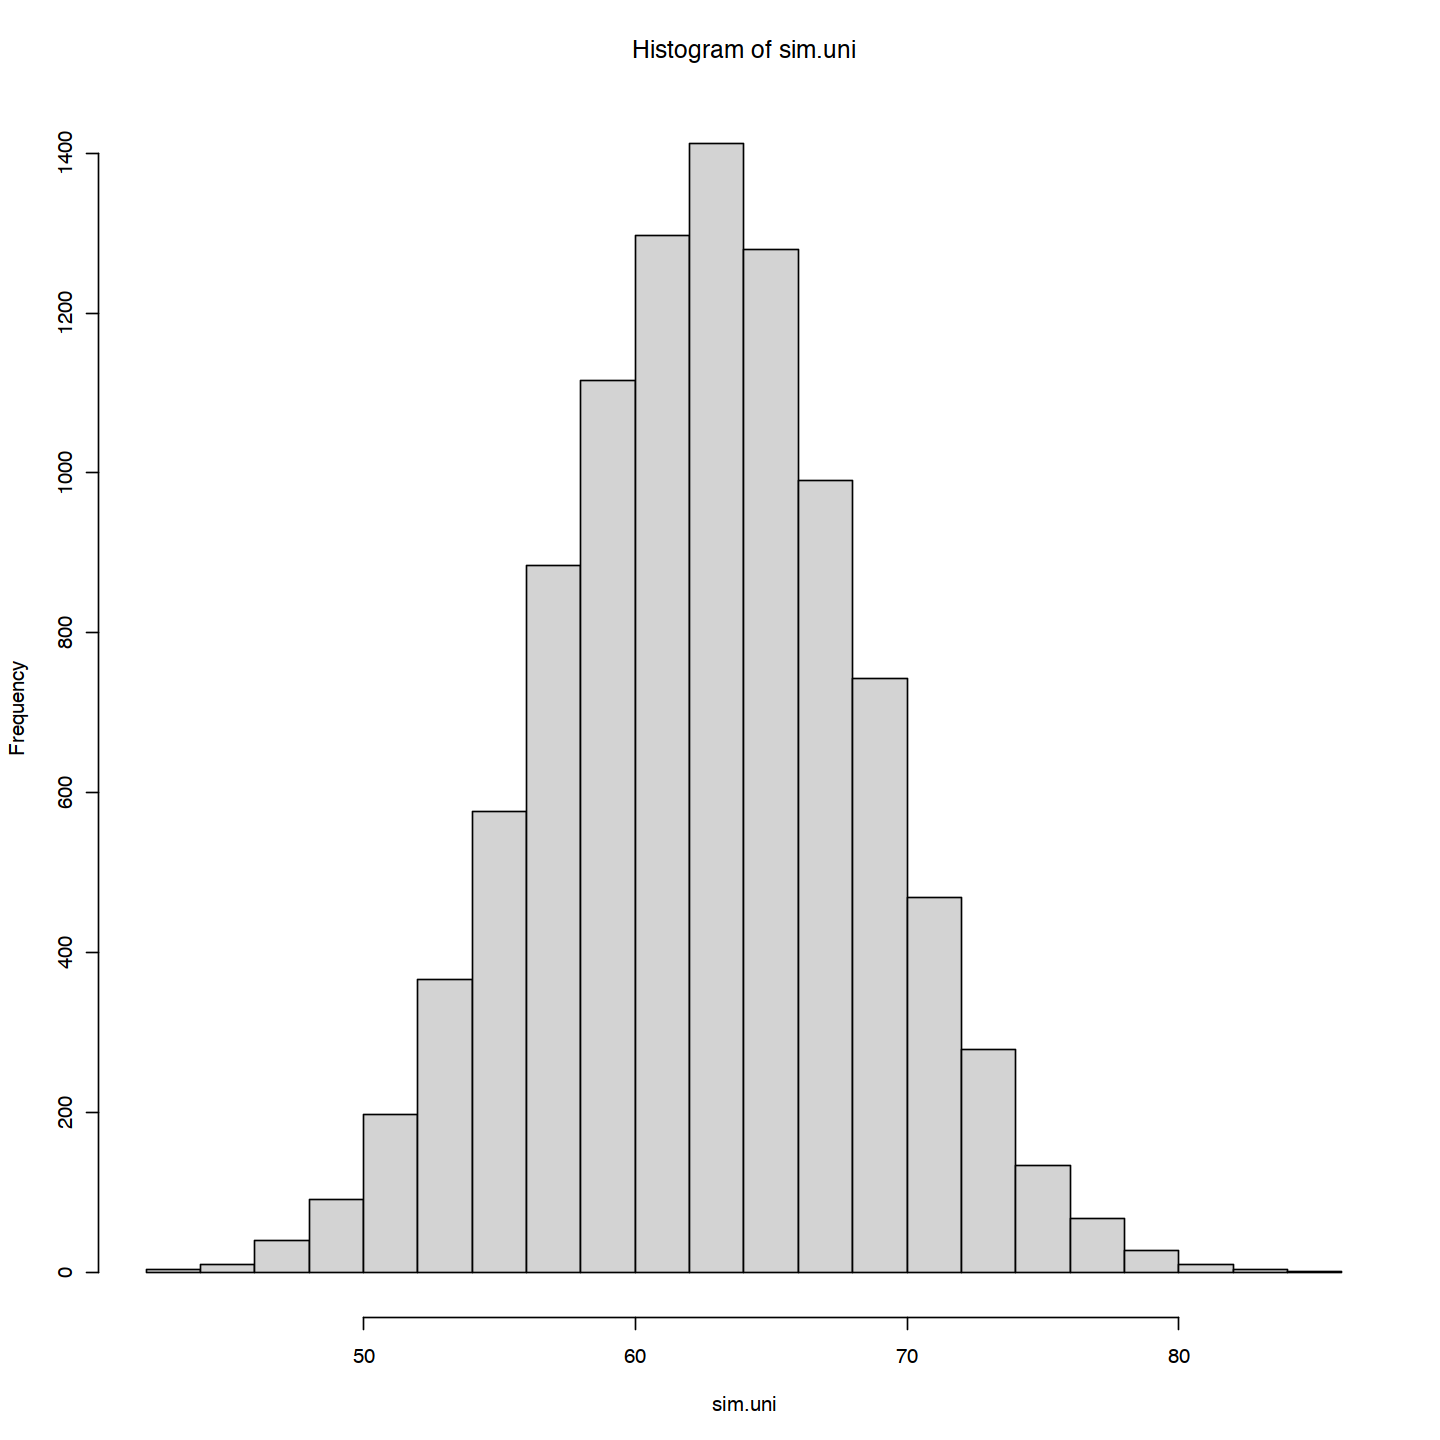

In [147]:
## simulate 10000 times how 138 would be of type A at Tolosa.
length(uni.int)
sim.uni<-rbinom(10000,length(uni.int),prob = prop.int)
hist(sim.uni)

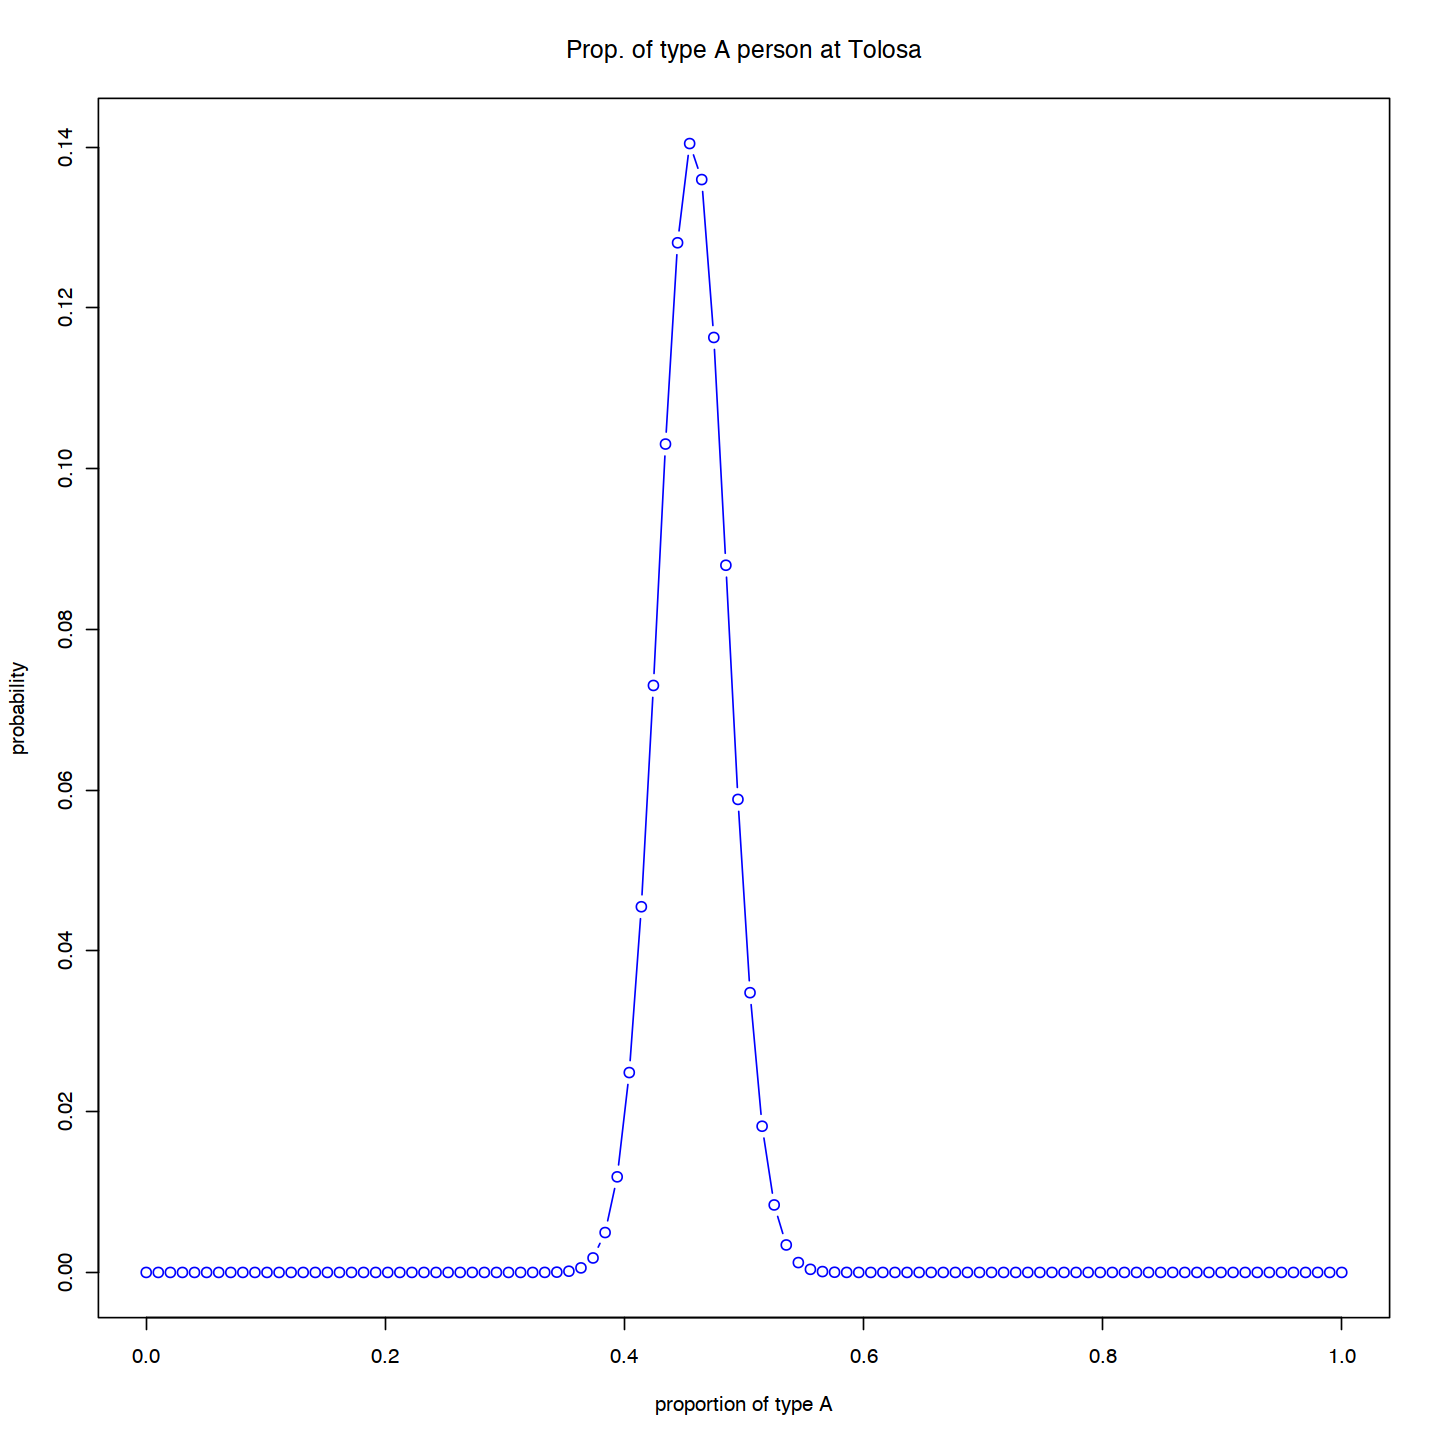

In [148]:
#let's try some simple bayes based on observed number of type A people
nU<-sum(uni.int)
typeAU<-length(uni.int)
p.grid<-seq(0,1,length.out=100)#define grid of probabilities
prior<-rep(1,100)
likelihoodU<-dbinom(typeAU,nU, prob=p.grid)#for each probability calculate the likelihood
#compute product of likelihood and prior
unst.posteriorU<-prior*likelihoodU#which is the same in this case
#std posterior
std.postU<-unst.posteriorU/sum(unst.posteriorU)
plot(p.grid,std.postU,type = "b",col="blue",
     xlab = "proportion of type A",
     ylab="probability",main="Prop. of type A person at Tolosa")

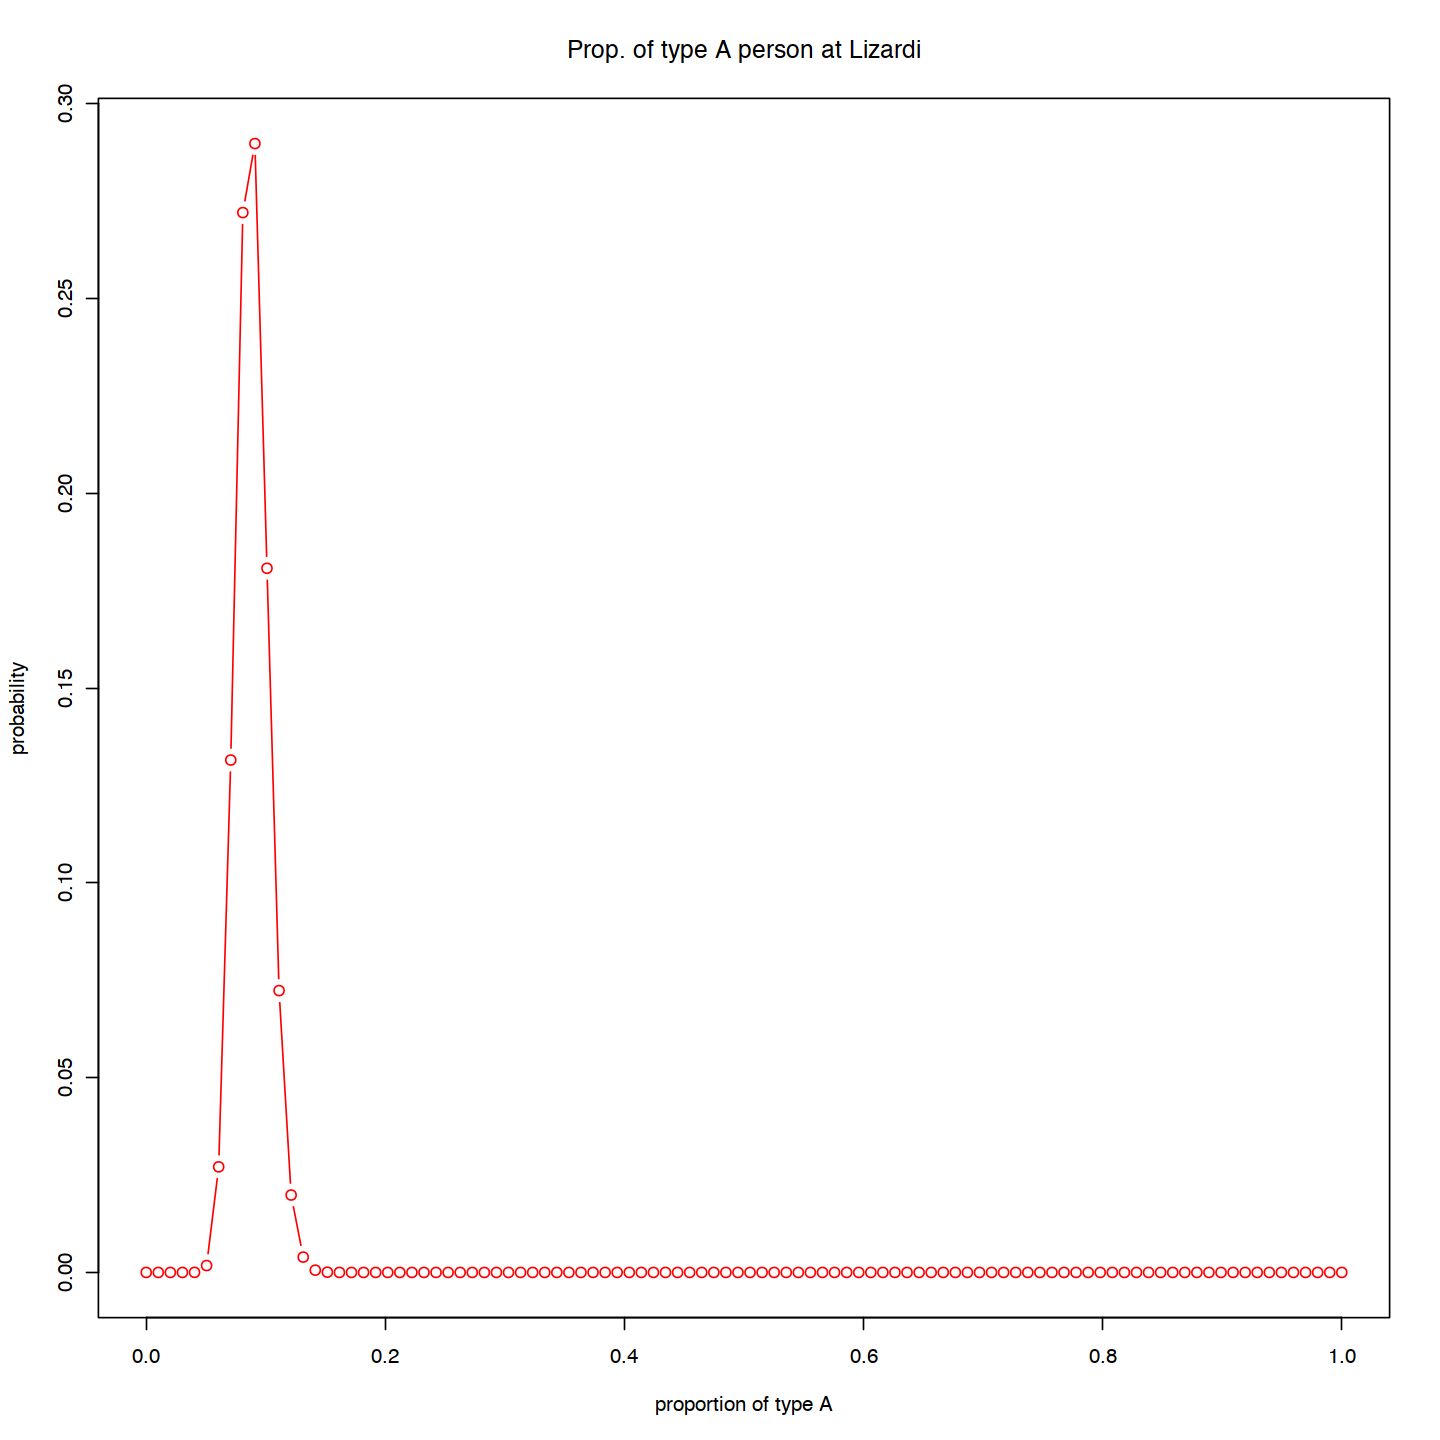

In [149]:
#let's try some simple bayes based on observed number of type A people
nl<-sum(liz.int)
typeAl<-length(liz.int)
likelihoodl<-dbinom(typeAl,nl, prob=p.grid)#for each probability calculate the likelihood
#compute product of likelihood and prior
unst.posteriorl<-prior*likelihoodl#which is the same in this case
#std posterior
std.postl<-unst.posteriorl/sum(unst.posteriorl)
plot(p.grid,std.postl,type = "b",col="red",
     xlab = "proportion of type A",
     ylab="probability",main="Prop. of type A person at Lizardi")

In [150]:
#dataframe with the two models together
str(std.postl)
str(std.postU)
str(p.grid)

 num [1:100] 0.00 2.57e-23 2.11e-13 2.22e-08 2.26e-05 ...
 num [1:100] 0.00 2.84e-187 1.84e-146 6.71e-123 2.10e-106 ...
 num [1:100] 0 0.0101 0.0202 0.0303 0.0404 ...


In [151]:
my_df<-data.frame(proportion=c(p.grid,p.grid),probability=c(std.postl,std.postU), 
    location=c(rep("lizardi",length=100),rep("tolosa",length=100)))
head(my_df)
str(my_df)

,proportion,probability,location
,<dbl>,<dbl>,<chr>
1,0.00000000,0.000000e+00,lizardi
2,0.01010101,2.570073e-23,lizardi
3,0.02020202,2.107829e-13,lizardi
4,0.03030303,2.219162e-08,lizardi
5,0.04040404,2.260853e-05,lizardi
6,0.05050505,1.776252e-03,lizardi


'data.frame':	200 obs. of  3 variables:
 $ proportion : num  0 0.0101 0.0202 0.0303 0.0404 ...
 $ probability: num  0.00 2.57e-23 2.11e-13 2.22e-08 2.26e-05 ...
 $ location   : chr  "lizardi" "lizardi" "lizardi" "lizardi" ...


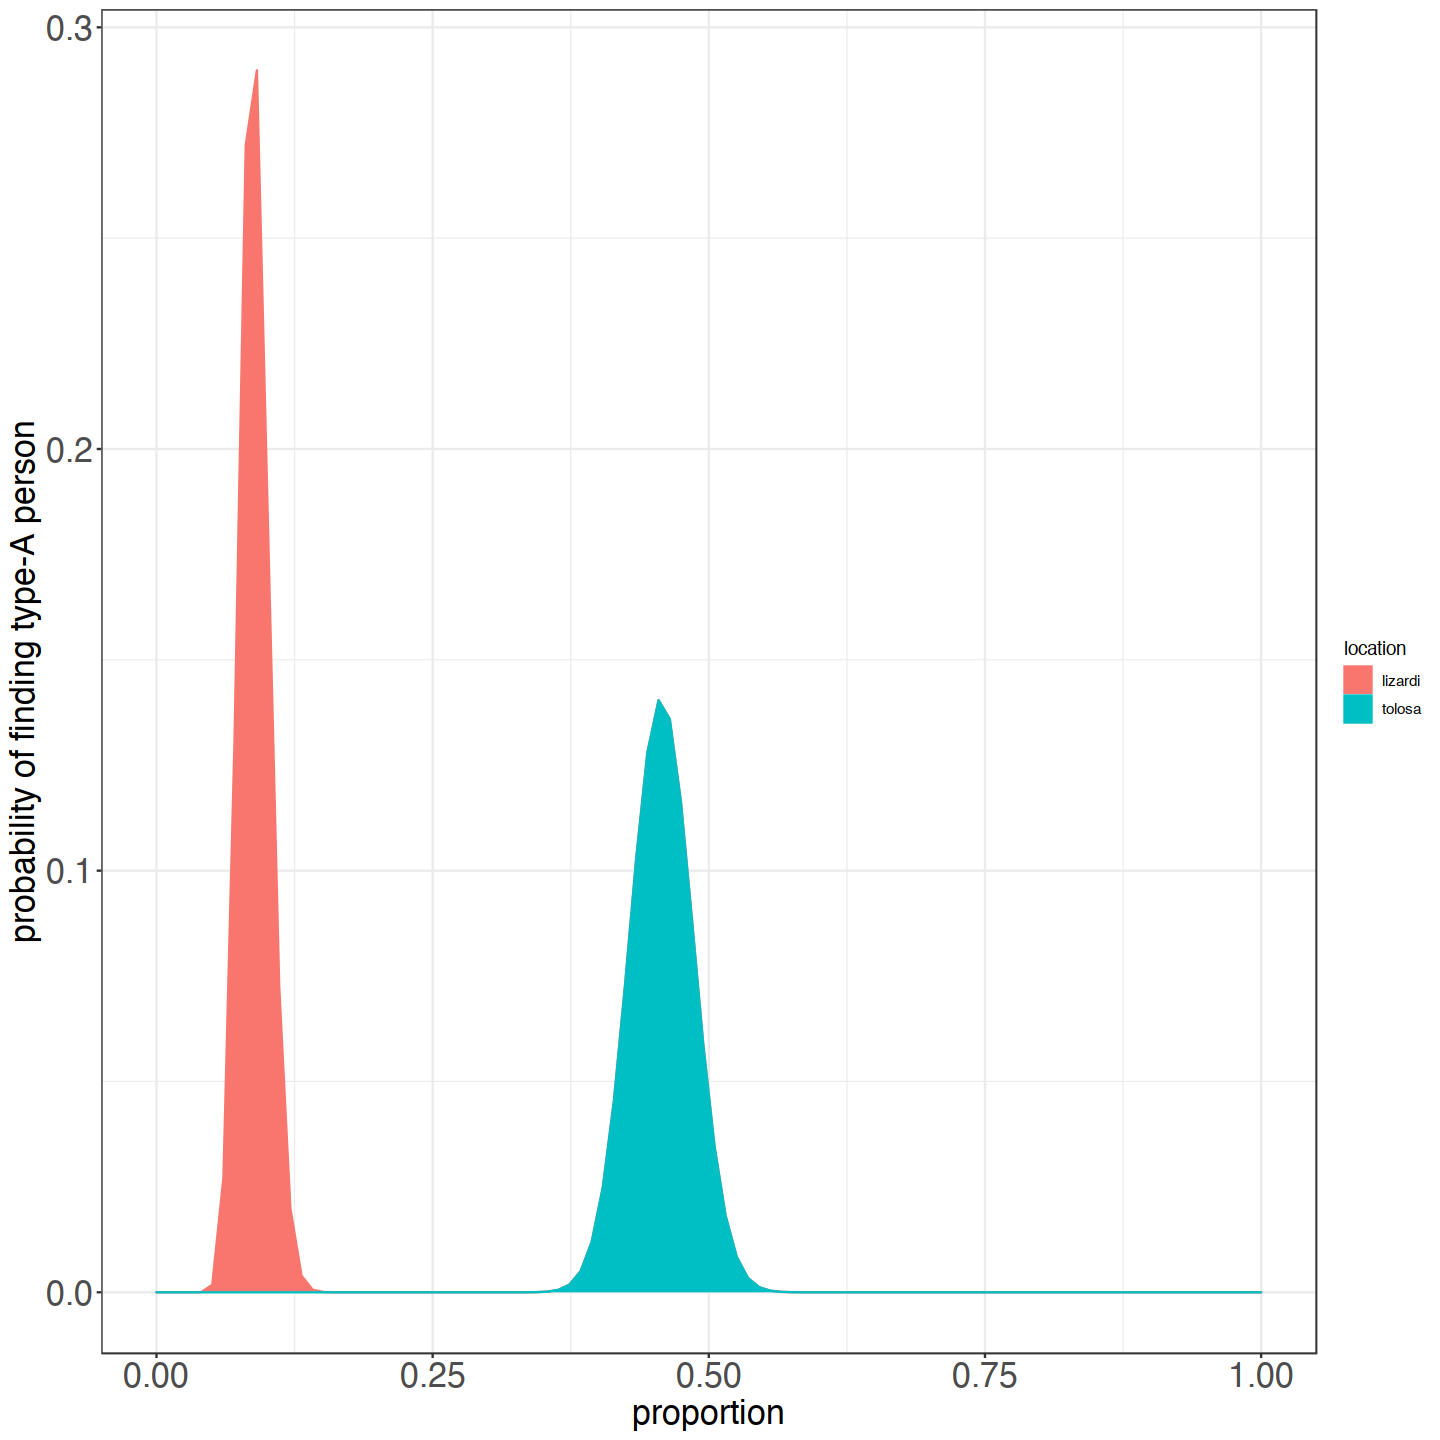

In [152]:
# feeding into ggplot. 
library(ggplot2)
fig<-ggplot(my_df, aes(x = proportion,y=probability,fill=location,col=location)) +
geom_area() +
  labs(y = "probability of finding type-A person")+theme_bw()+
  theme(axis.text = element_text(size = 20),axis.title = element_text(size = 20))  
fig

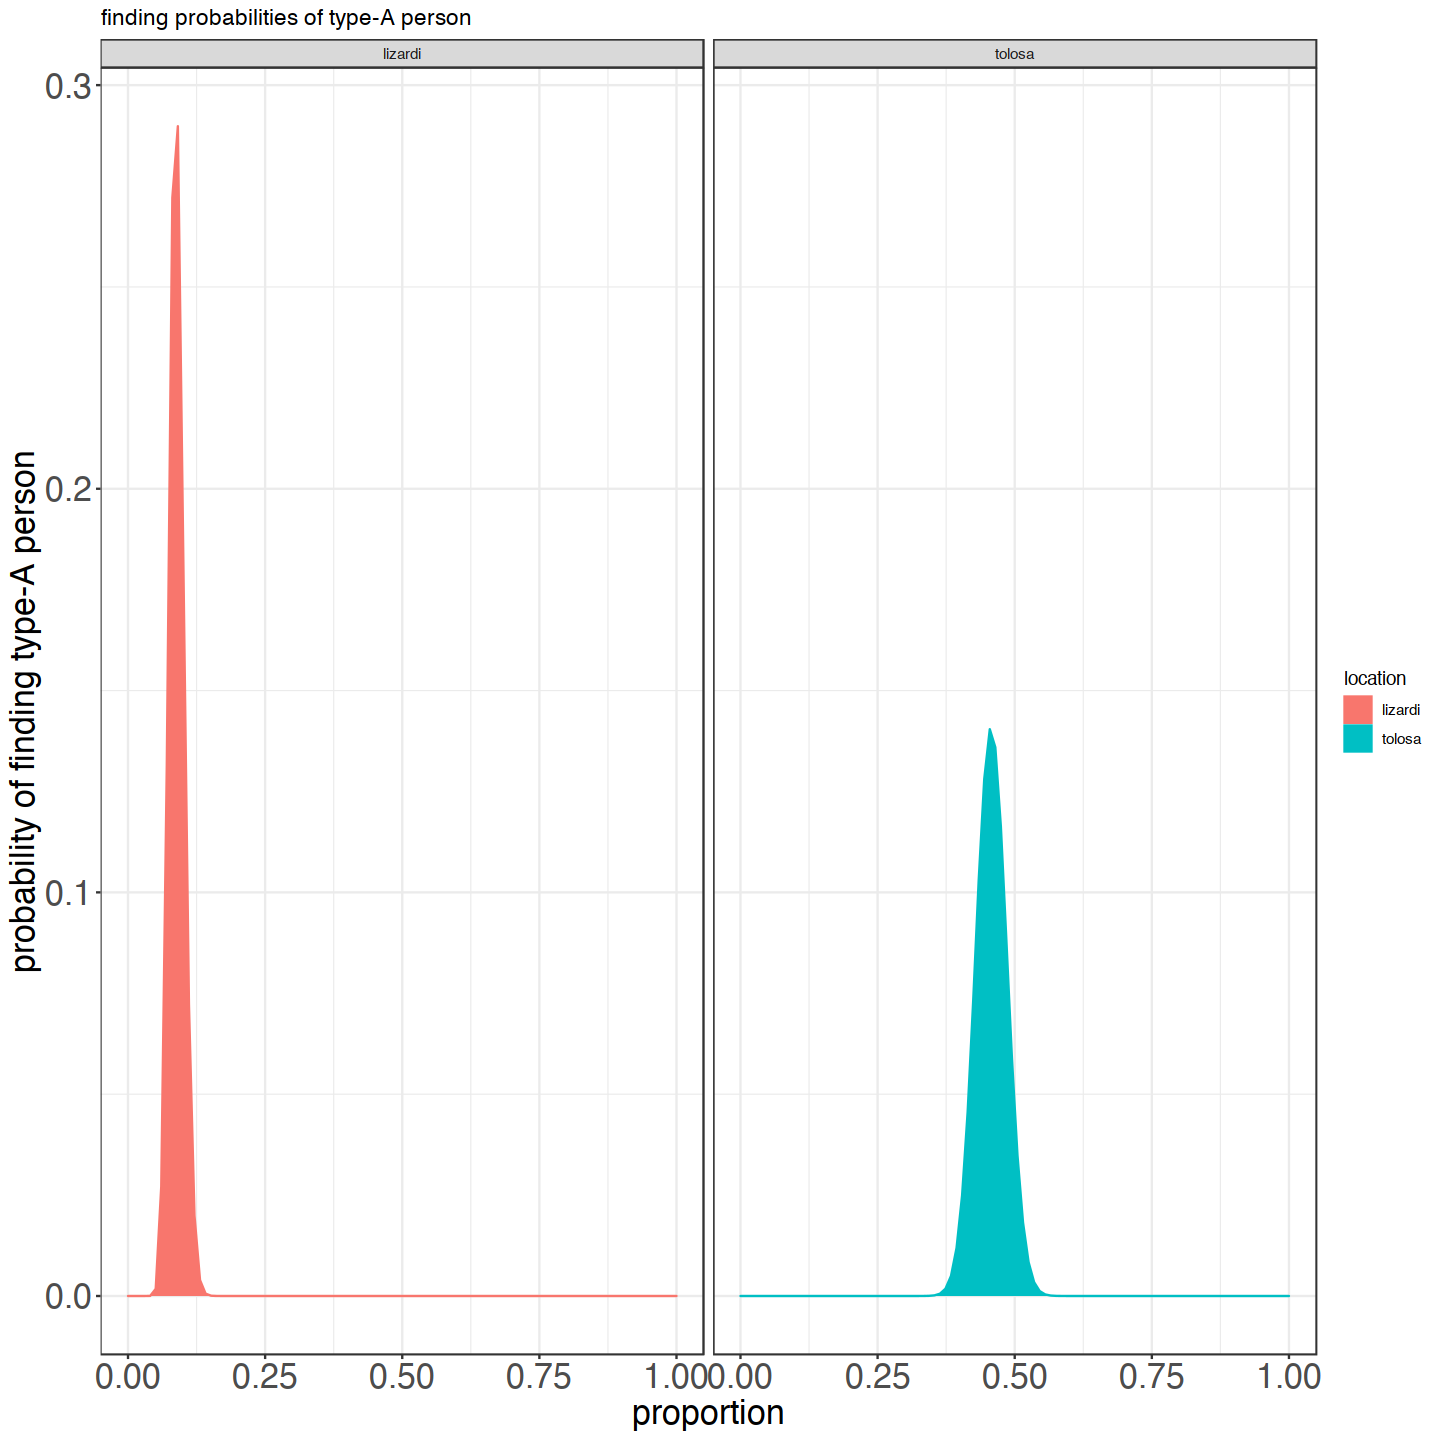

In [153]:
fig + facet_wrap(~location, ncol = 2)+
  ggtitle("finding probabilities of type-A person")+
  theme(axis.title.x = element_text(size = 20))

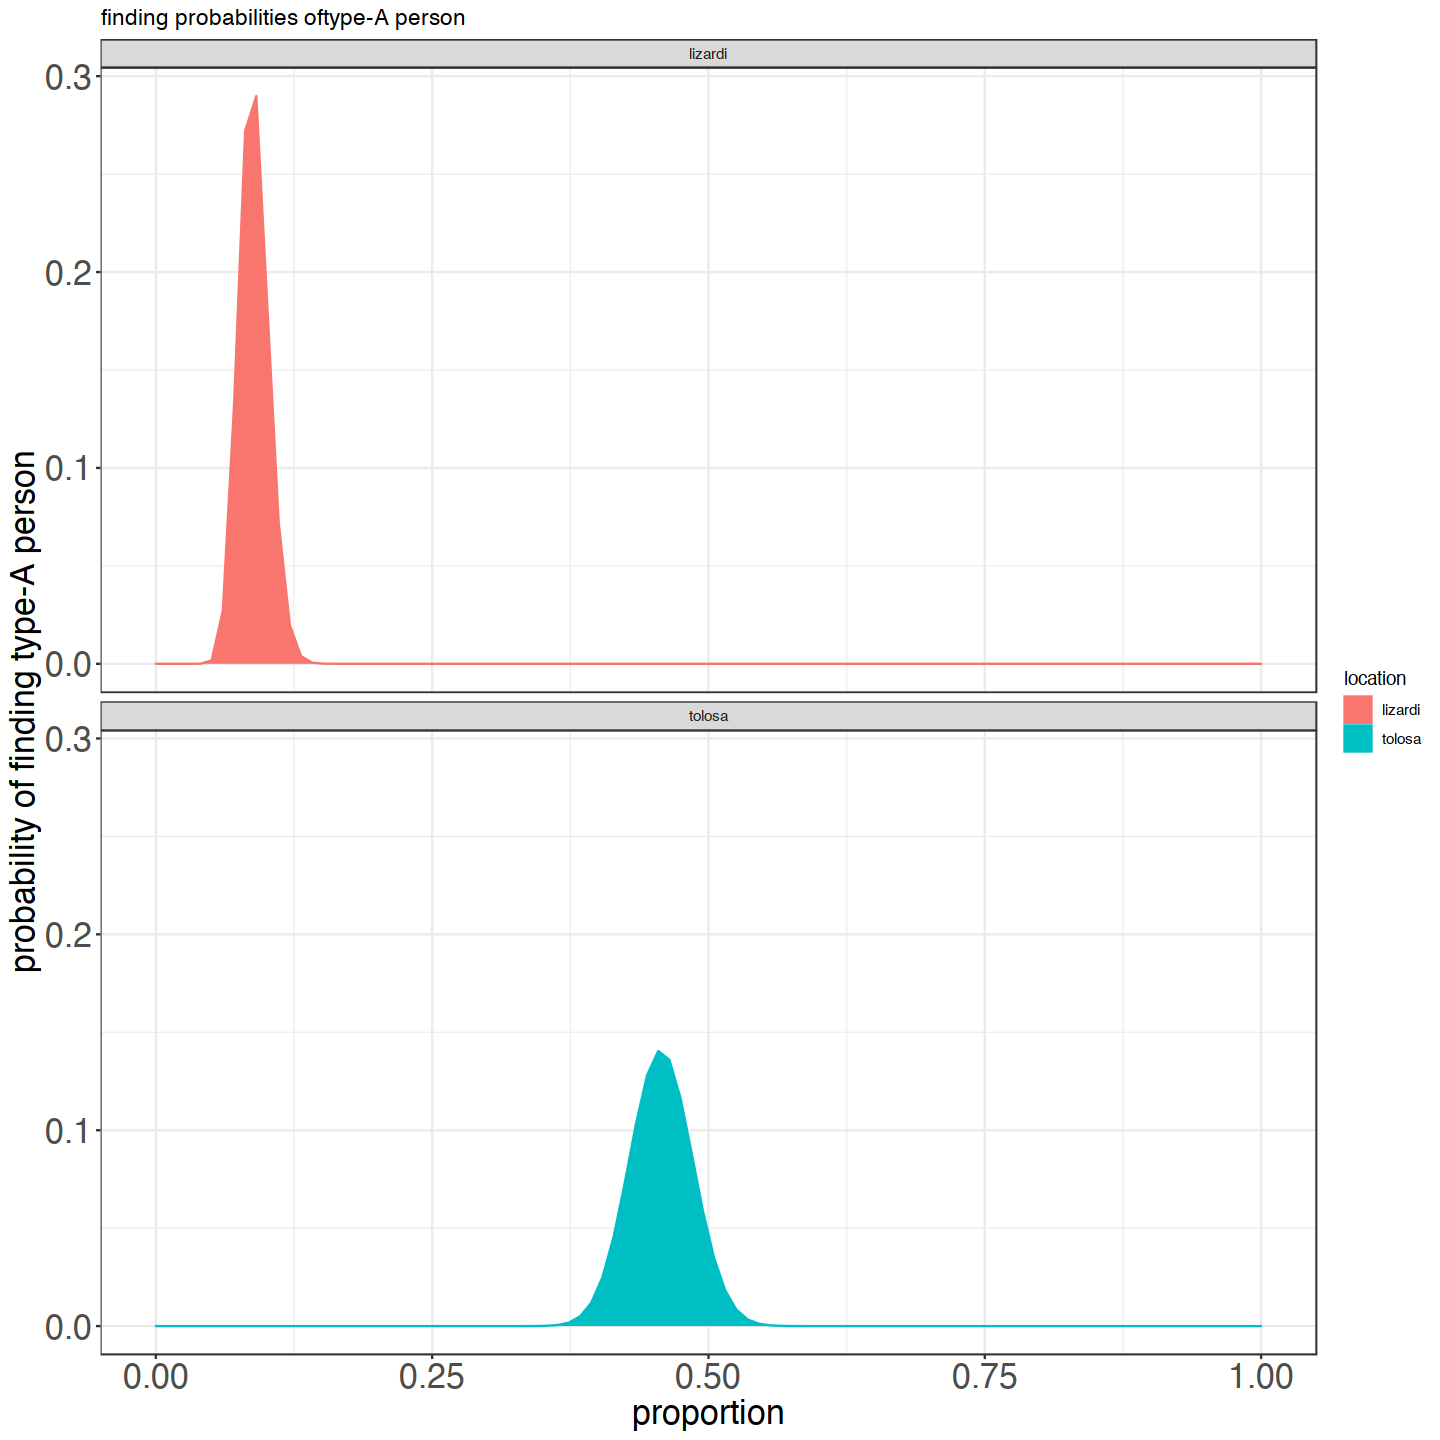

In [154]:
fig + facet_wrap(~location, ncol = 1)+
  ggtitle("finding probabilities oftype-A person")

In [164]:
#well, no sense here, since this is a sequence of values!!
#but for the sake of playing
par(mfrow = c(1,2))
qqnorm(lstd.postl)
qqline(std.postl)

qqnorm(std.postU)
qqline(std.postl)

ERROR: Error in qqnorm(lstd.postl): object 'lstd.postl' not found


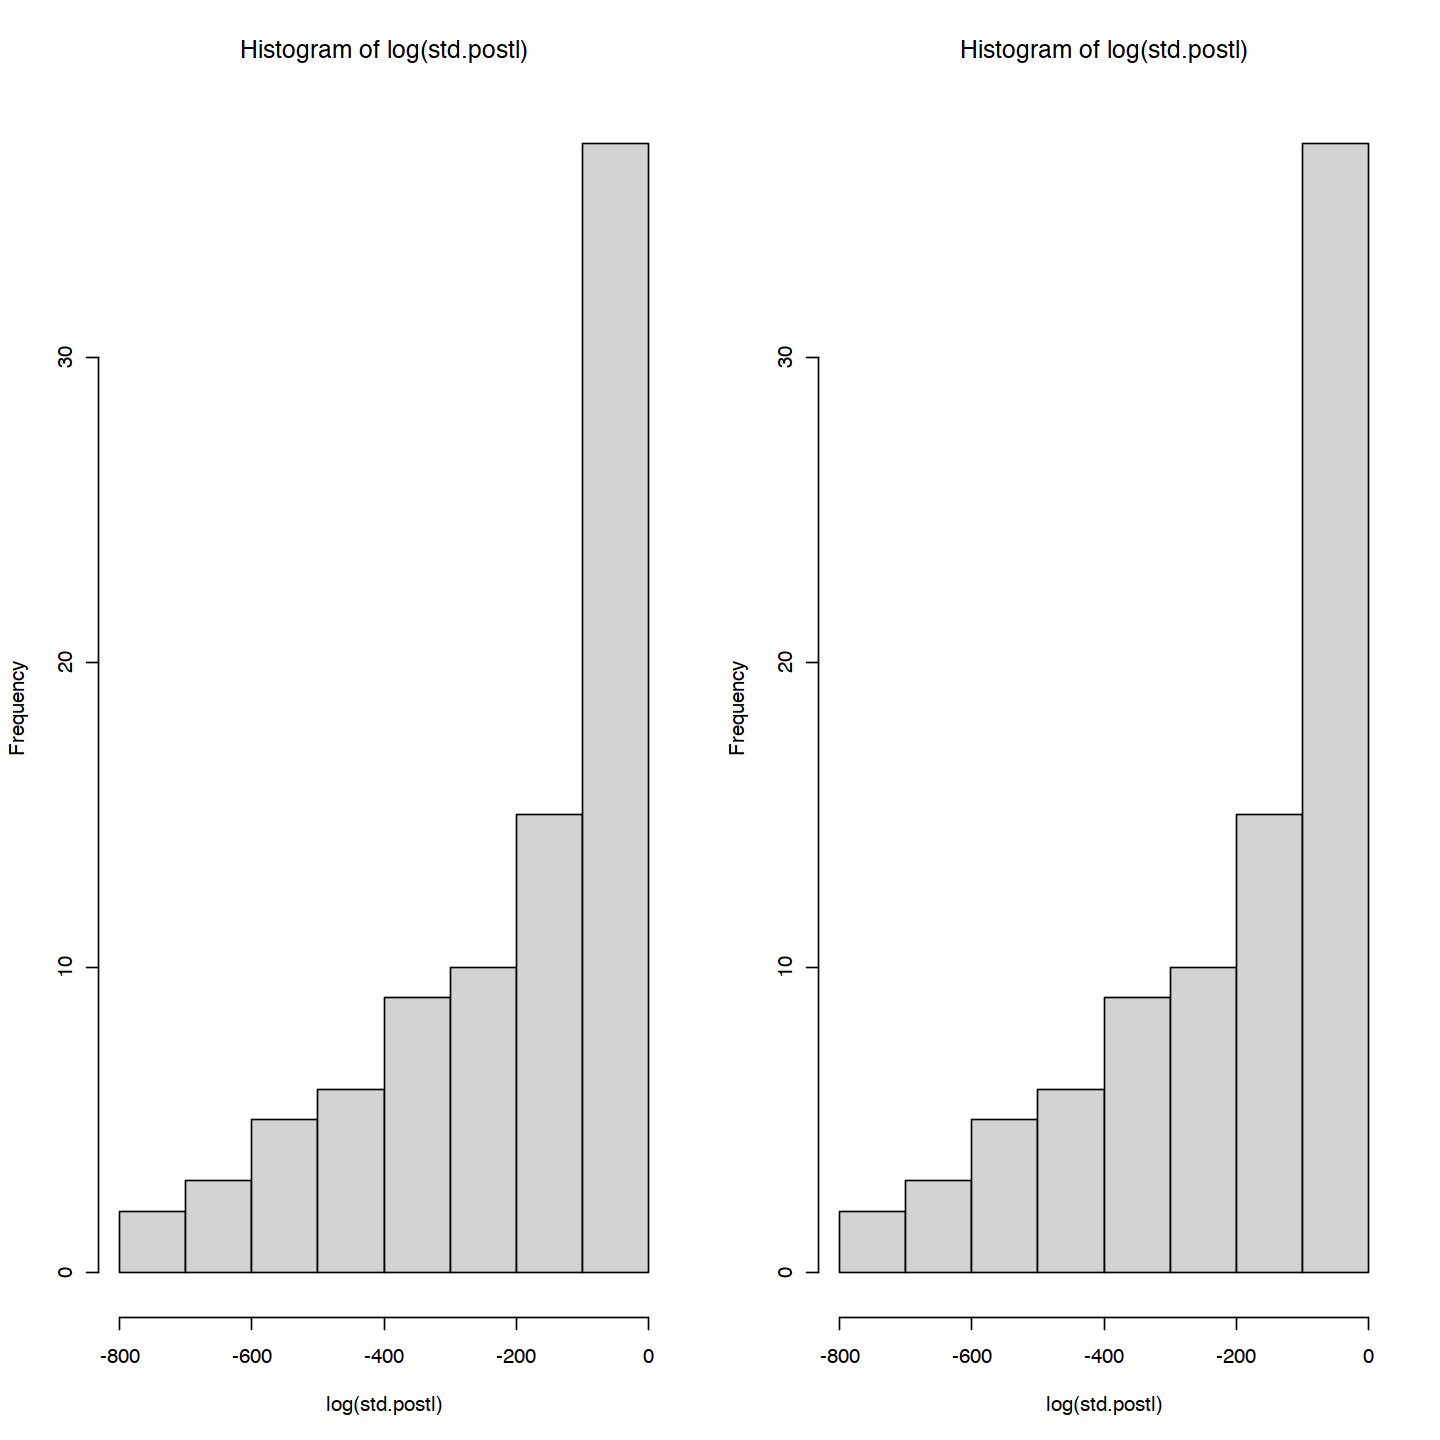

In [160]:
par(mfrow = c(1,2))
hist(log(std.postl))
hist(log(std.postl))